### Importing Libraries

In [1717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Data Exploration and cleaning

In [1718]:
df=pd.read_csv("train.csv")

In [1719]:
df.shape

(1460, 81)

In [1720]:
# to print whole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1721]:
df.isnull().sum()*100/len(df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### Dropping Id along with varaiables having more than 30 percent missing valuess

In [1722]:
df=df.drop(["Id","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [1723]:
df.shape

(1460, 75)

In [1724]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [1725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Clearly some columns have missing values which we fill later

In [1726]:
#checking dtype of each column along with value counts to check if datatype is correct corresponding to the variables are taking.
for i in df.columns:
    print(i,df[i].dtype,"\n",df[i].value_counts(),"\n")

MSSubClass int64 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning object 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotFrontage float64 
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0    

Name: WoodDeckSF, dtype: int64 

OpenPorchSF int64 
 0      656
36      29
48      22
20      21
45      19
40      19
30      16
24      16
60      15
28      14
39      14
54      13
50      13
44      13
72      12
98      11
32      11
35      11
63      11
42      10
75      10
96      10
120     10
66       9
64       9
84       8
78       8
70       8
16       8
56       8
68       8
38       8
102      7
25       7
130      7
27       7
144      7
114      7
33       7
80       7
100      6
55       6
140      6
51       6
116      6
46       6
22       6
26       6
104      5
110      5
74       5
76       5
128      5
112      5
88       5
90       5
108      5
65       5
150      5
18       5
62       5
29       5
59       5
21       5
105      4
168      4
113      4
49       4
52       4
82       4
57       4
154      4
34       4
122      3
136      3
124      3
166      3
158      3
184      3
111      3
192      3
234      3
151      3
132      3
69       3
87       3
6

In [1727]:
#changing dtype
df["MSSubClass"] = df["MSSubClass"].astype(str)

In [1728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Feature selection and enginerring

In [1729]:
df.loc[1:50,["MSSubClass","HouseStyle"]]

MSSubClass HouseStyle
1          20     1Story
2          60     2Story
3          70     2Story
4          60     2Story
5          50     1.5Fin
6          20     1Story
7          60     2Story
8          50     1.5Fin
9         190     1.5Unf
10         20     1Story
11         60     2Story
12         20     1Story
13         20     1Story
14         20     1Story
15         45     1.5Unf
16         20     1Story
17         90     1Story
18         20     1Story
19         20     1Story
20         60     2Story
21         45     1.5Unf
22         20     1Story
23        120     1Story
24         20     1Story
25         20     1Story
26         20     1Story
27         20     1Story
28         20     1Story
29         30     1Story
30         70     2Story
31         20     1Story
32         20     1Story
33         20     1Story
34        120     1Story
35         60     2Story
36         20     1Story
37         20     1Story
38         20     1Story
39         90     1Story
40         20     1Story
41         20     1Story
42         85     SFoyer
43         20     1Story
44         20     1Story
45        120     1Story
46         50     1.5Fin
47         20     1Story
48        190     2Story
49         20     1Story
50         60     2Story

### MSSubclass kind of explain housing style from its description so we are droopping one.

In [1730]:
df=df.drop("HouseStyle",axis=1)

### Making two new variables and dropping rest

In [1731]:
df["currentyear"] = 2022  
df["houseage"]= np.where(df["YearRemodAdd"].isnull()==True, df["currentyear"]-df["YearBuilt"], df["currentyear"]-df["YearRemodAdd"])
df["garageage"]=np.where(df["GarageYrBlt"].isnull()==True, np.nan, df["currentyear"]-df["GarageYrBlt"])

In [1732]:
df=df.drop(["currentyear","YearRemodAdd","YearBuilt","GarageYrBlt"],axis=1)

In [1733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [1734]:
#checking dtype of each column along with value counts to check if datatype is correct corresponding to the variables are taking.
for i in df.columns:
    print(i,df[i].dtype,"\n",df[i].value_counts(),"\n")

MSSubClass object 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning object 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotFrontage float64 
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0   

MoSold int64 
 6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64 

YrSold int64 
 2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64 

SaleType object 
 WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64 

SaleCondition object 
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64 

SalePrice int64 
 140000    20
135000    17
155000    14
145000    14
190000    13
          ..
337000     1
412500     1
306000     1
195400     1
206000     1
Name: SalePrice, Length: 663, dtype: int64 

houseage int64 
 72    178
16     97
15     76
17     73
18     62
22     55
19     51
20     48
14     40
26     36
24     36
27     31
46     30
23     30
52     26
25     25
45     25
13     23

In [1735]:
# baesd on this we can drop utilities as it has only one type of value
df=df.drop("Utilities",axis=1)

In [1736]:
# since MasVnrType has many value as "None we replace that with nothing"

df["MasVnrType"]=np.where(df["MasVnrType"]=="None","notpresent",df["MasVnrType"])

In [1737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  RoofMatl       1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

### EDA

### TARGET VARIABLE ANALYSIS

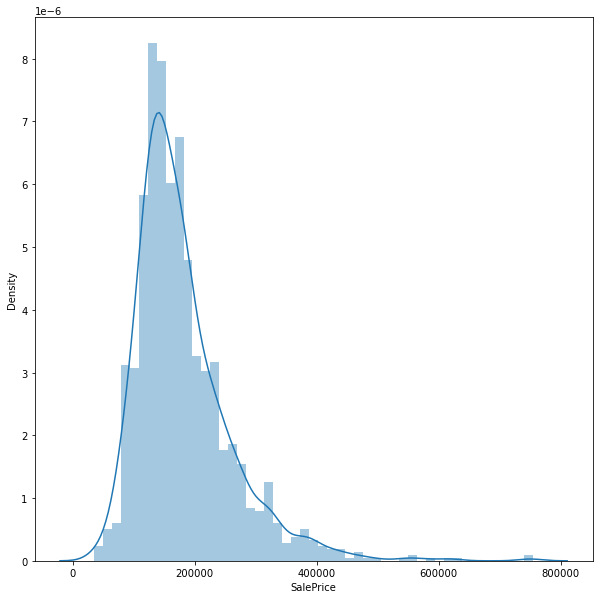

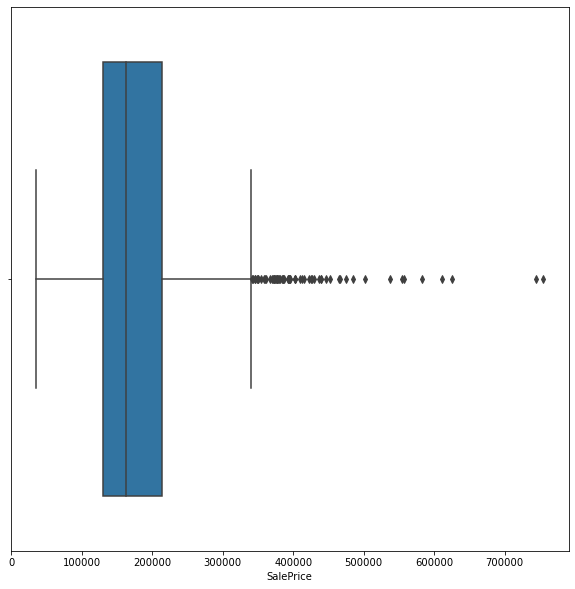

In [1738]:
sns.distplot(df["SalePrice"])
plt.show()

sns.boxplot(df["SalePrice"])
plt.show()

### we can say target variable is little skew and it has outliers as well. we can do its log transformation as well as that will make it less skew.

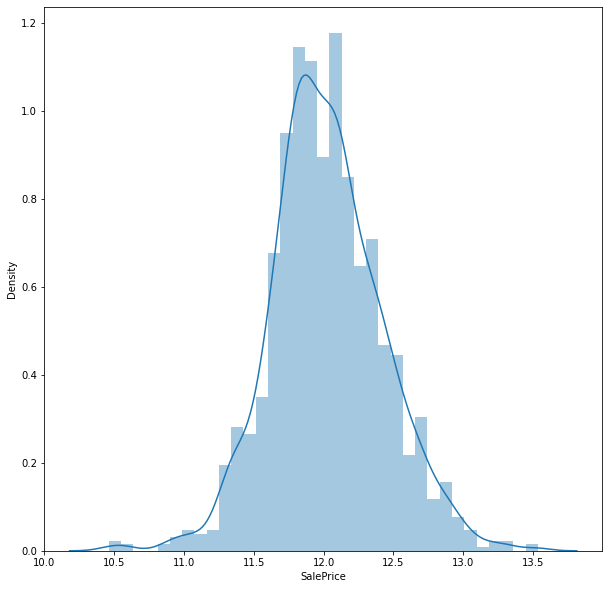

In [1740]:
sns.distplot(np.log(df["SalePrice"]))
plt.show()
             
#just for showcase purpose

### Outlier removal of target variable


In [1741]:
per99= np.percentile(df["SalePrice"],99)
per1=np.percentile(df["SalePrice"],1)

df=df[(df["SalePrice"]>per2) & (df["SalePrice"]<per98)]

In [1742]:
df.shape

(1430, 72)

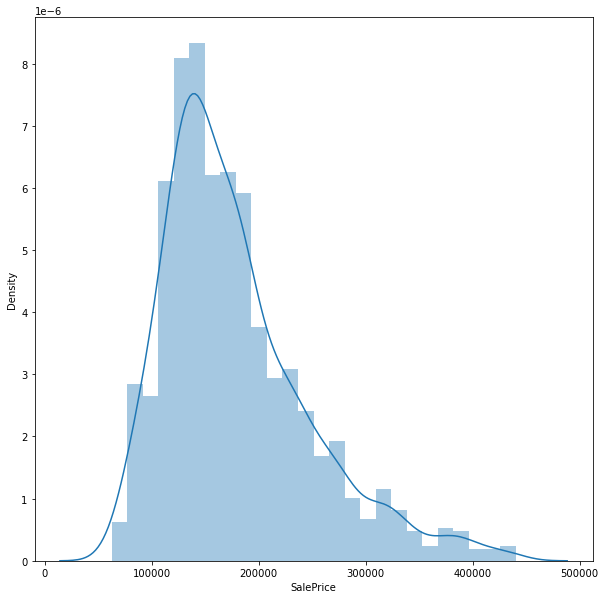

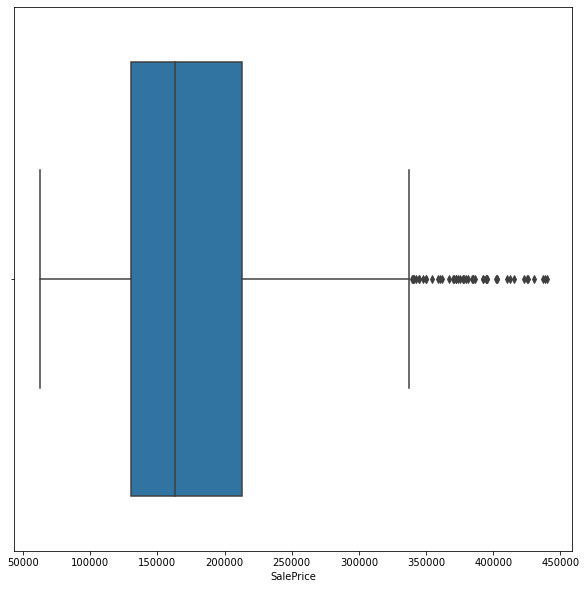

In [1743]:
sns.distplot(df["SalePrice"])
plt.show()

sns.boxplot(df["SalePrice"])
plt.show()

### Univariate Analysis

In [1744]:
catvars=[]
numvars=[]
for i in df.columns:
    if(df[i].dtype=="object"):
        catvars.append(i)
    else:
        numvars.append(i)

In [1745]:
df.shape

(1430, 72)

In [1746]:
len(numvars),len(catvars)

(35, 37)

In [1747]:
df[numvars]= df[numvars].astype("float64")

### Countplot

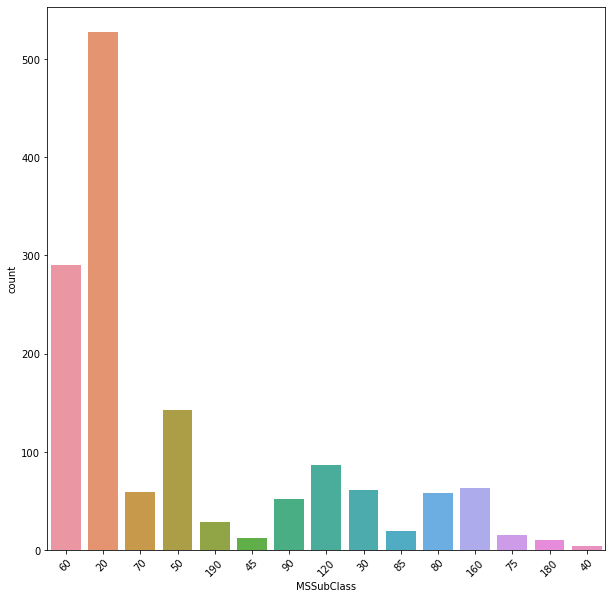

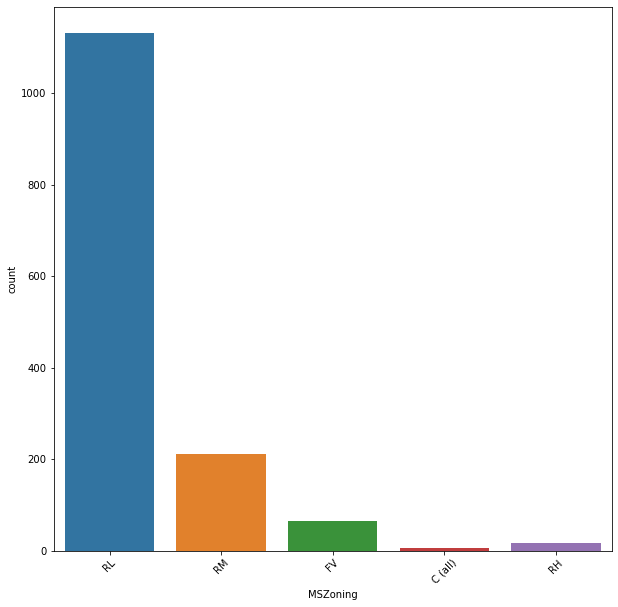

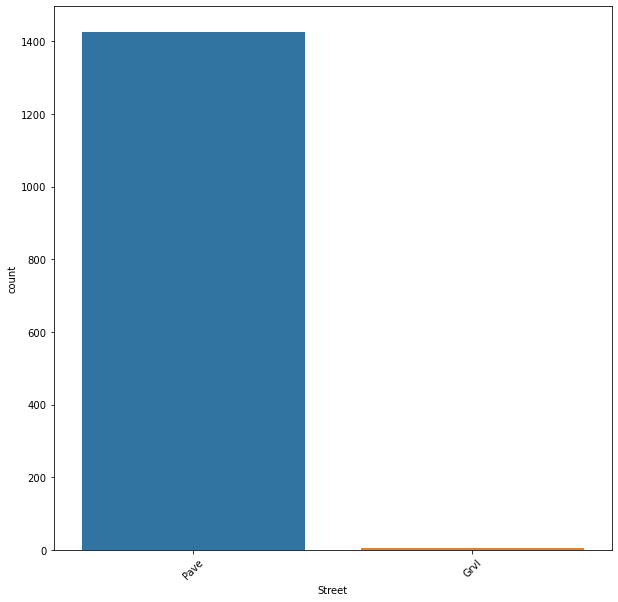

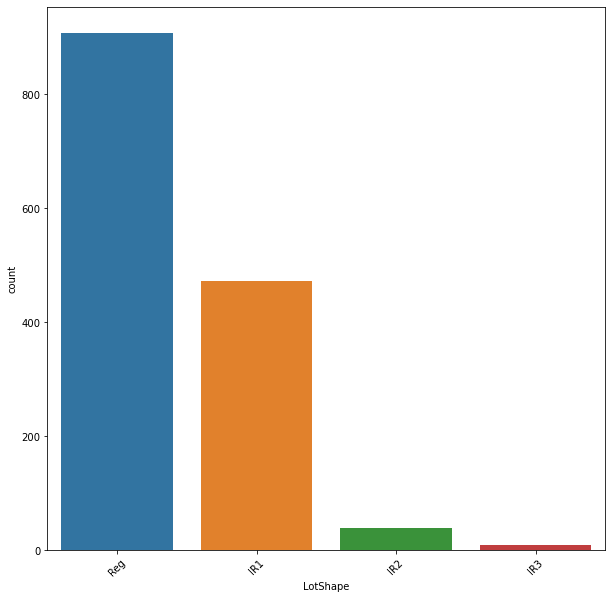

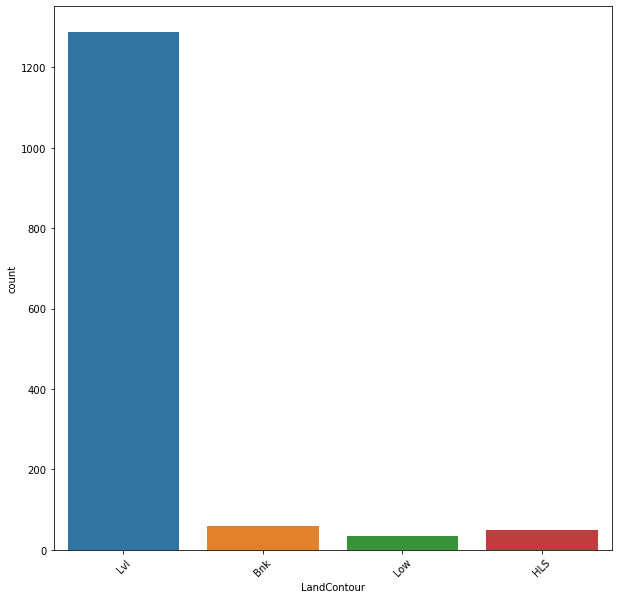

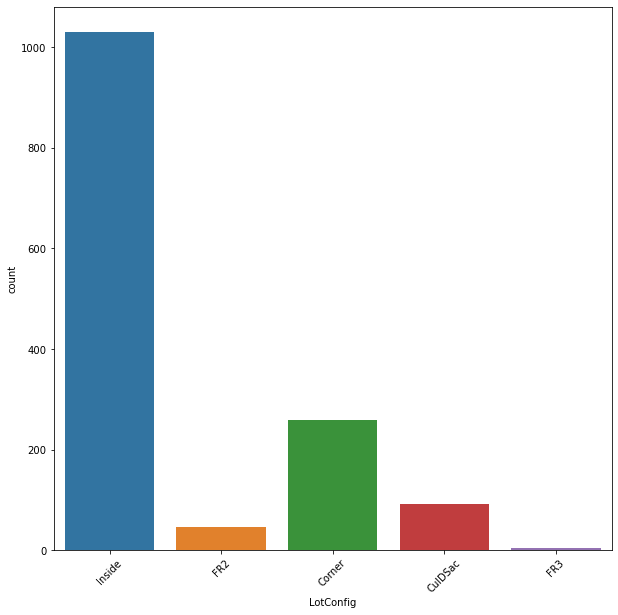

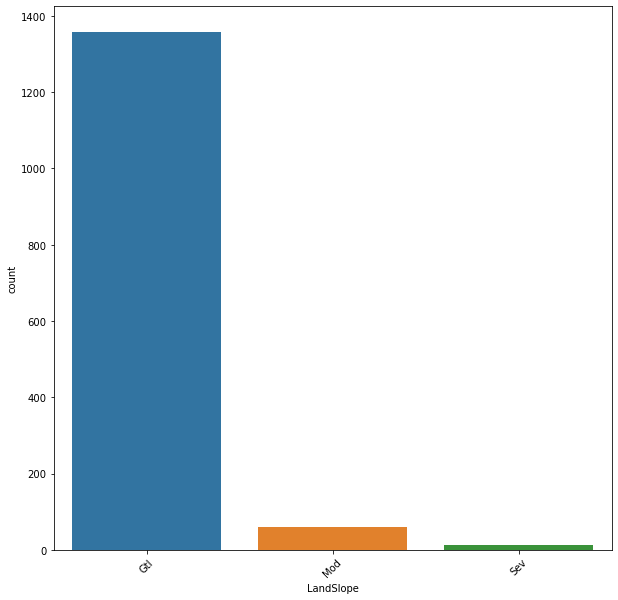

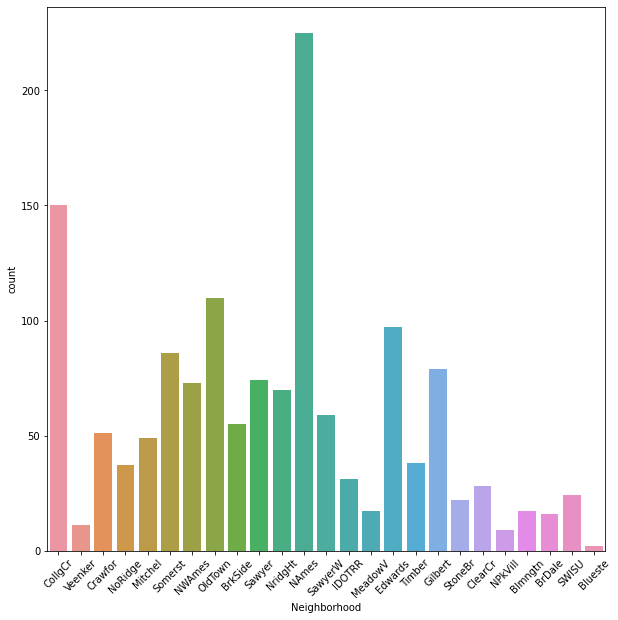

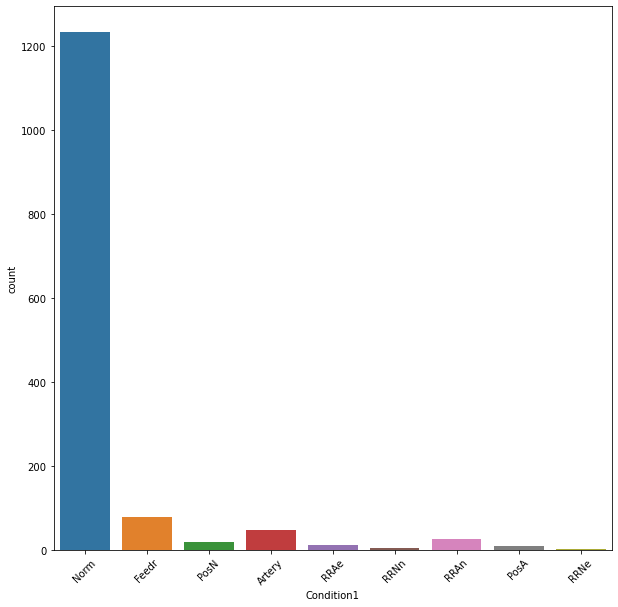

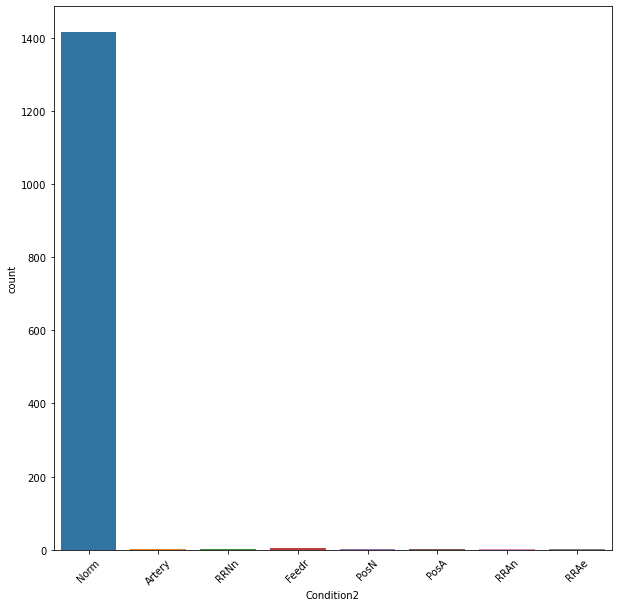

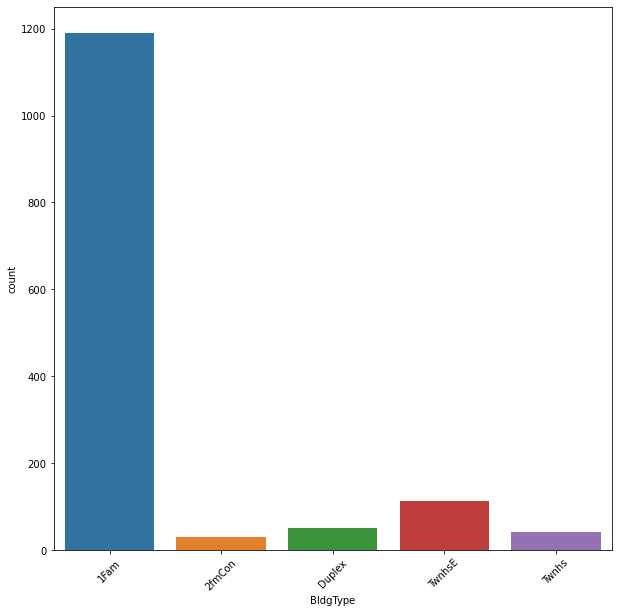

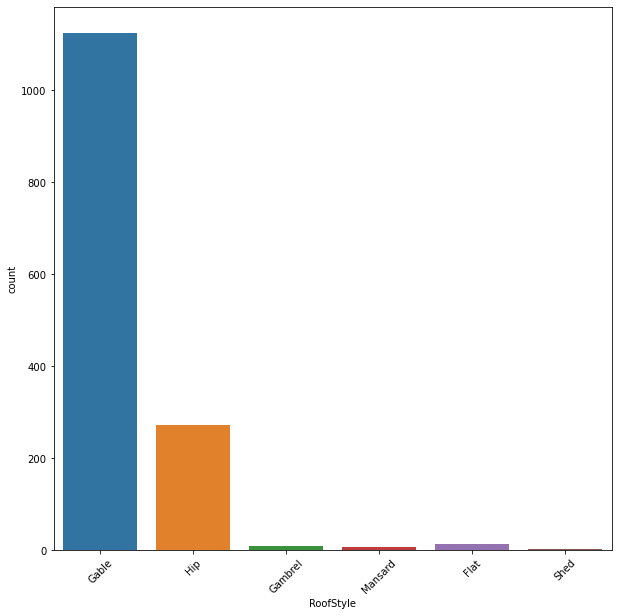

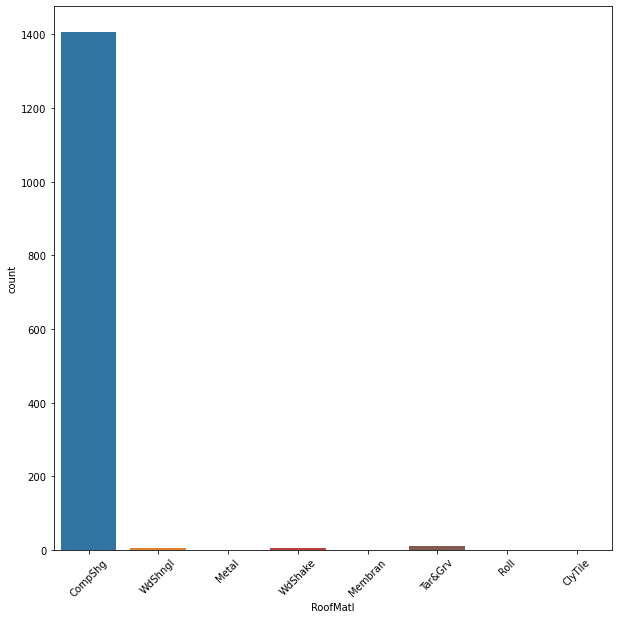

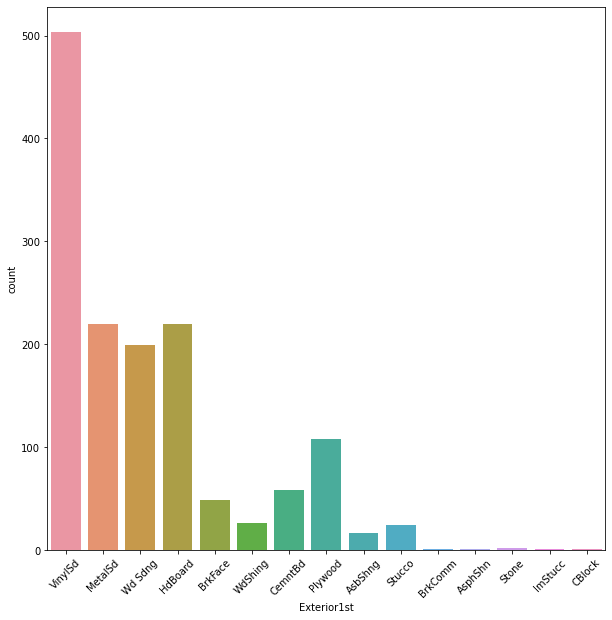

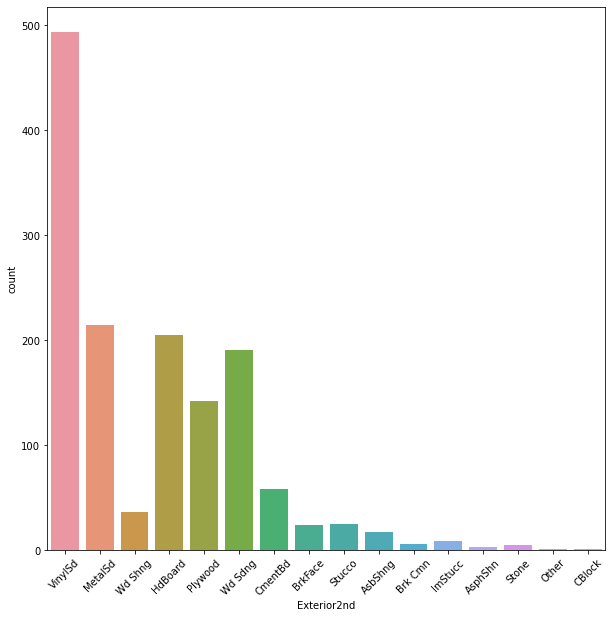

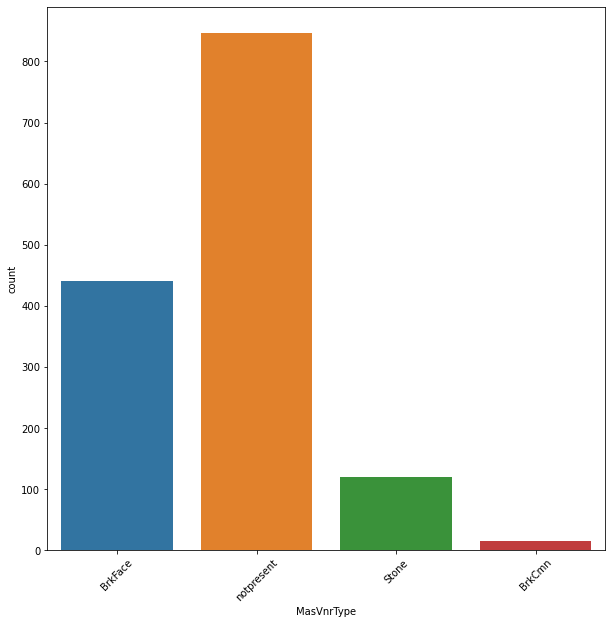

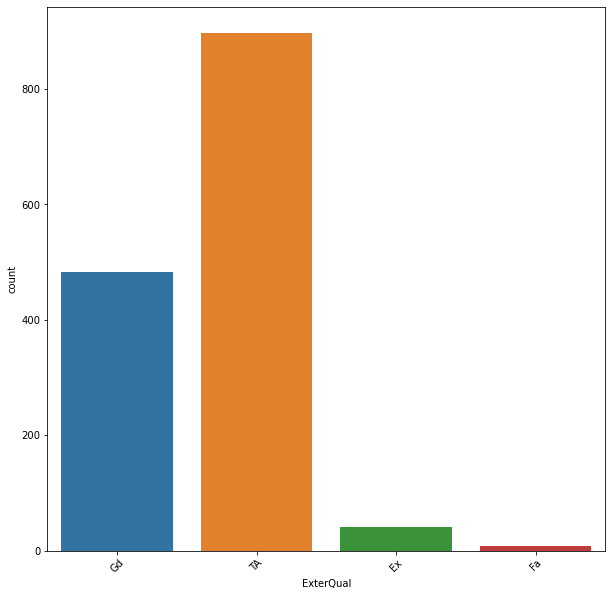

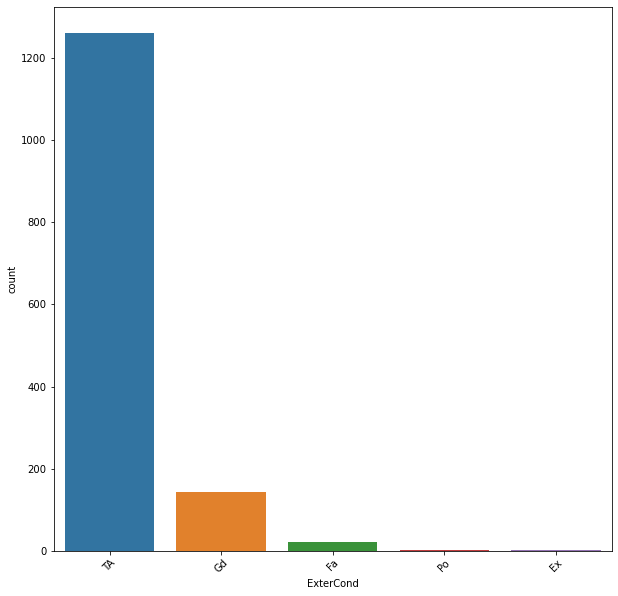

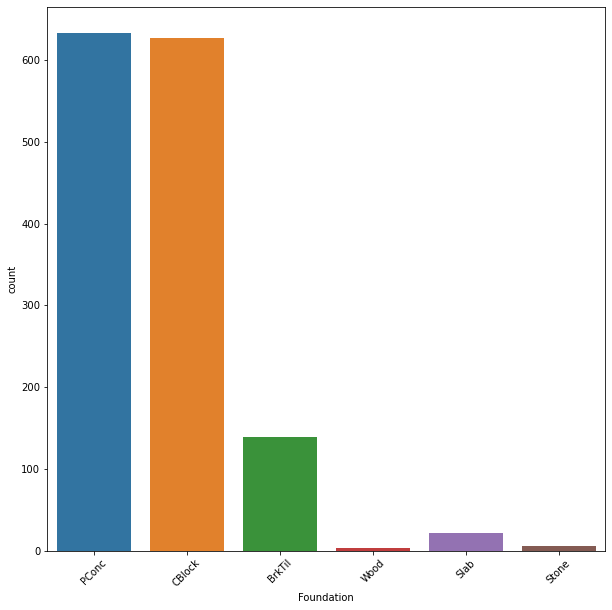

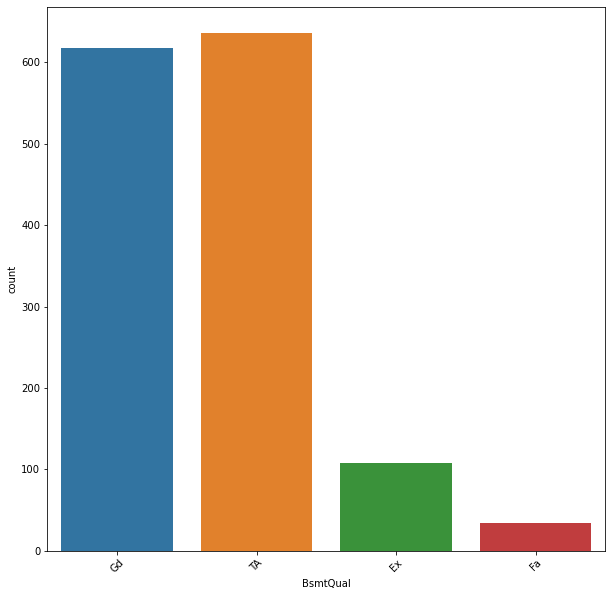

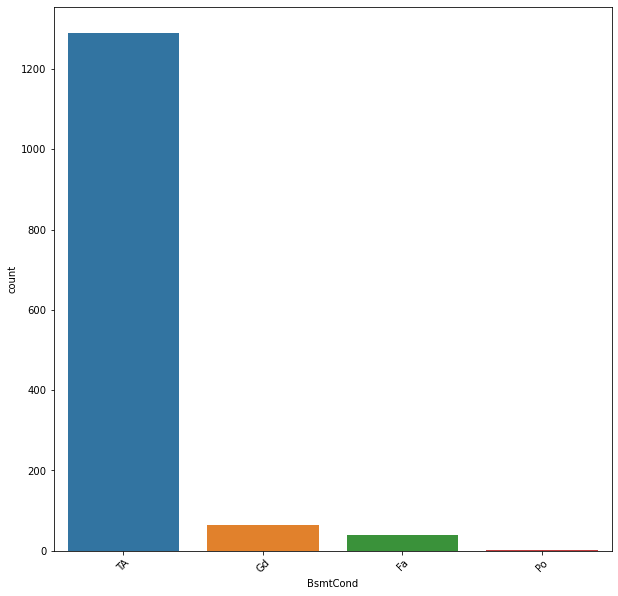

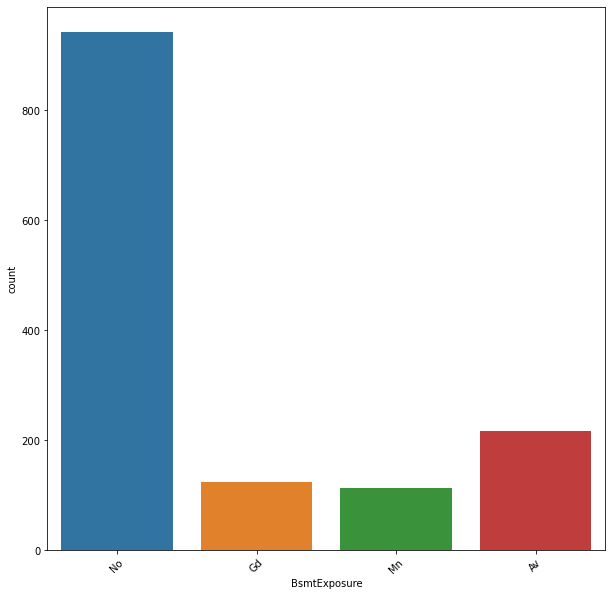

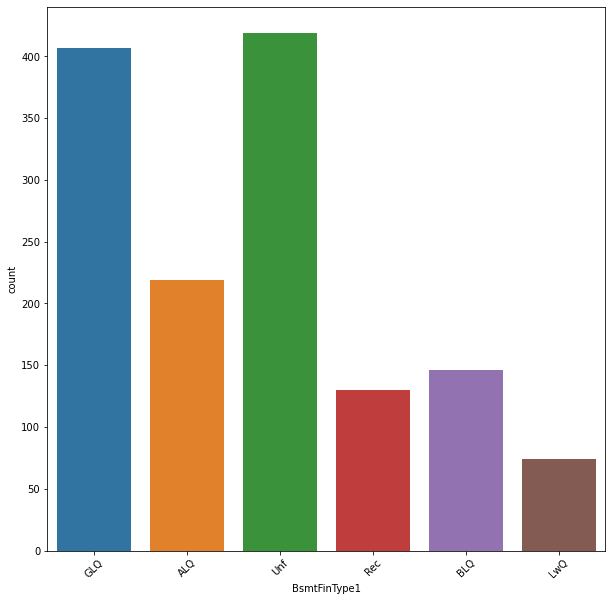

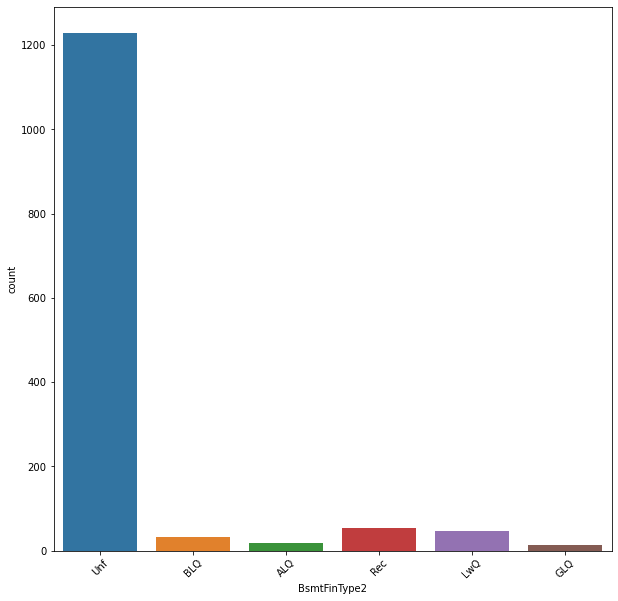

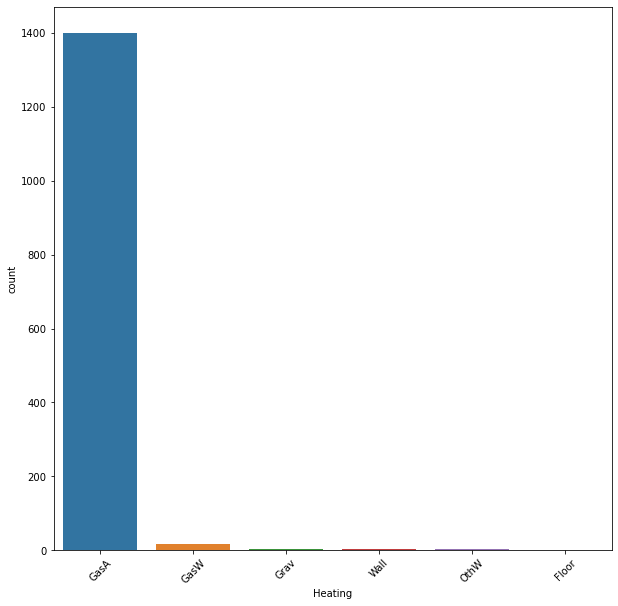

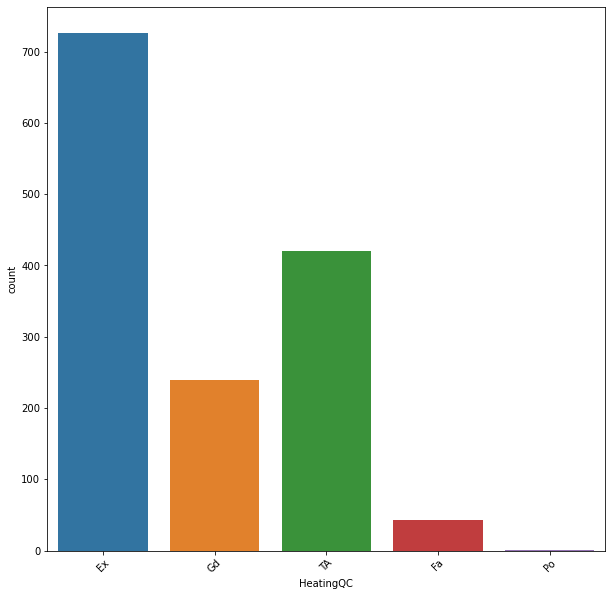

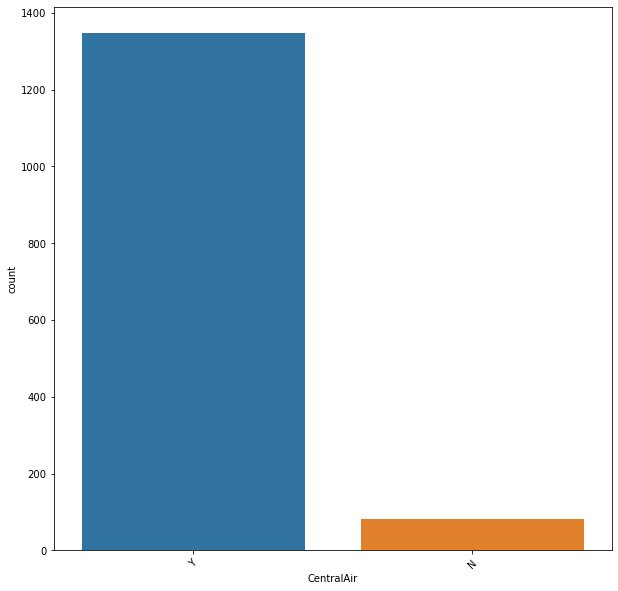

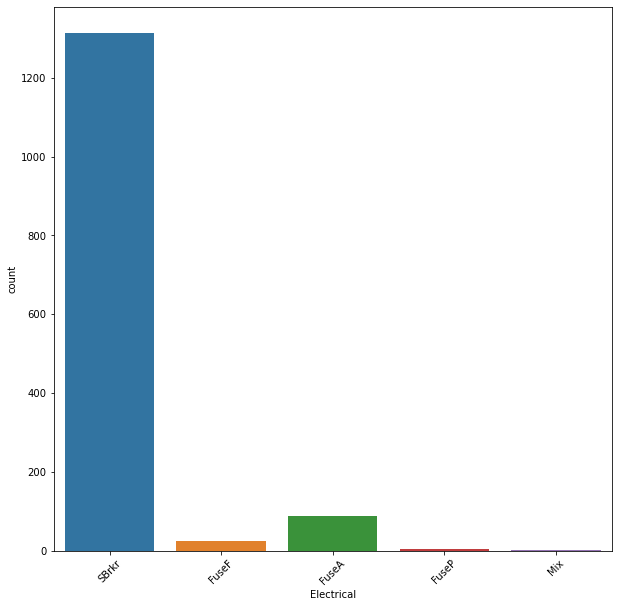

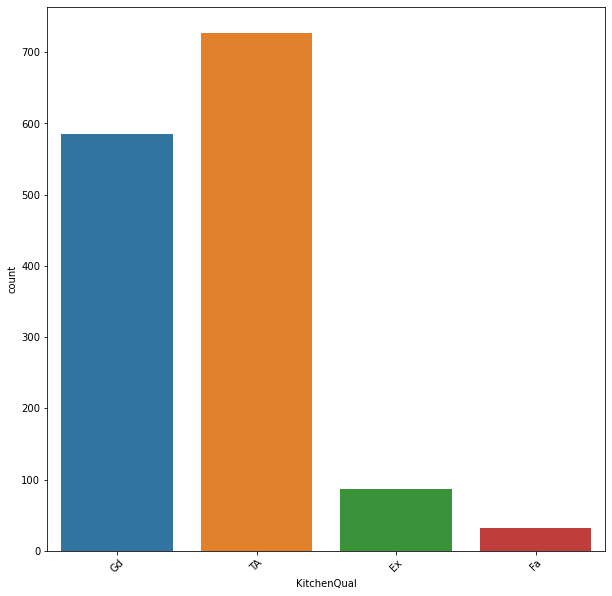

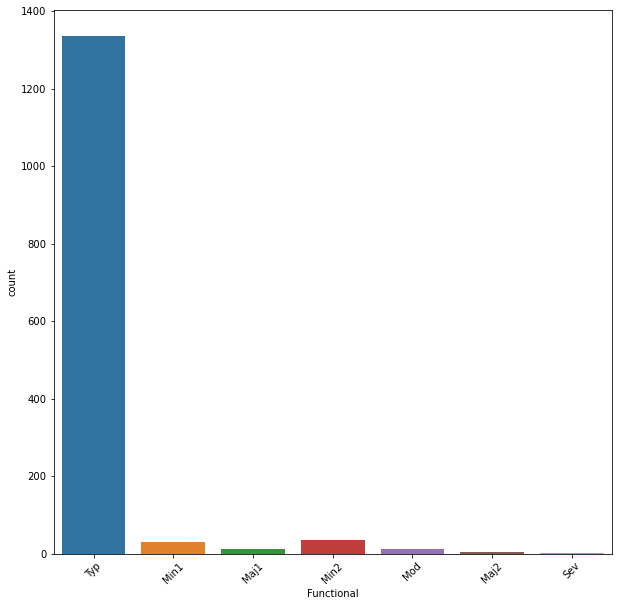

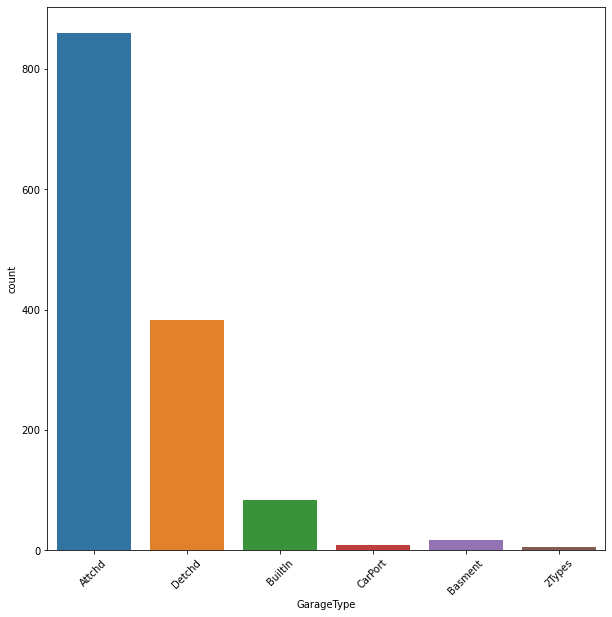

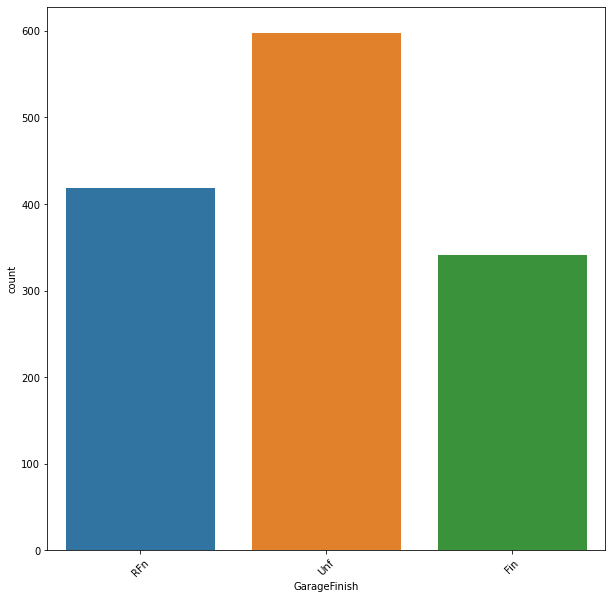

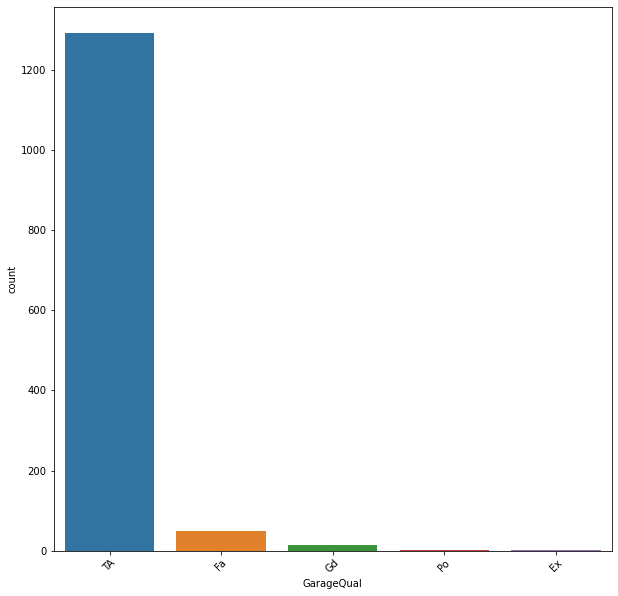

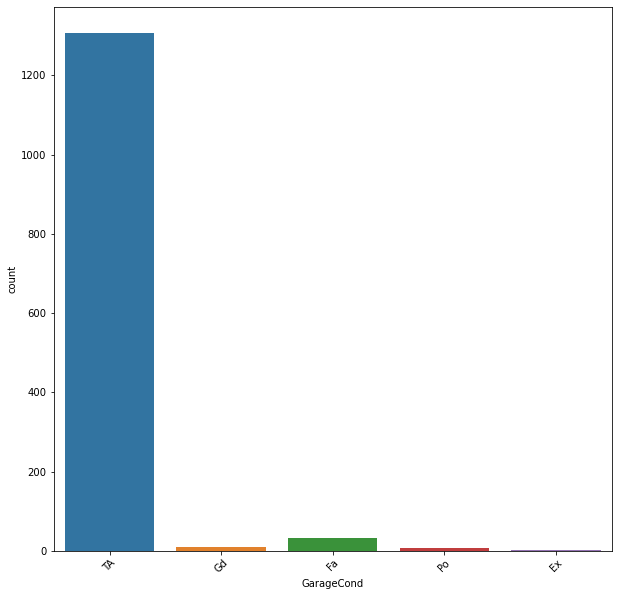

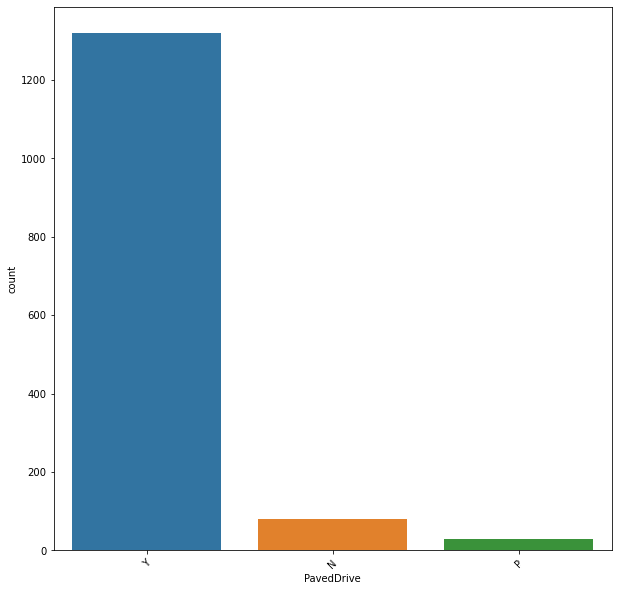

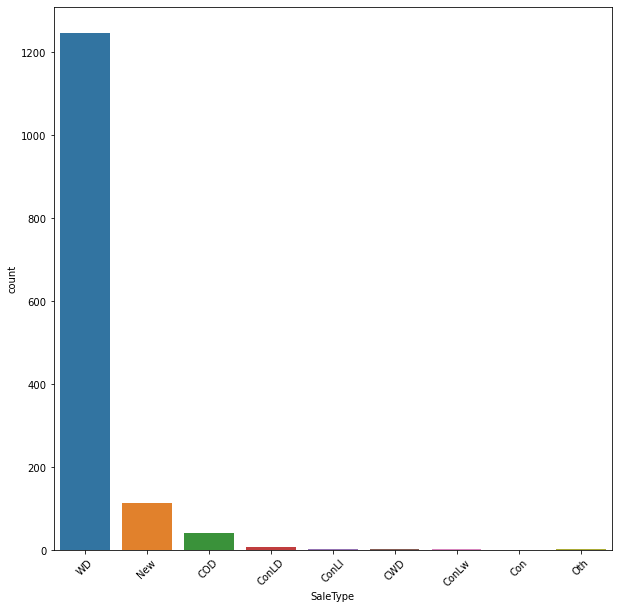

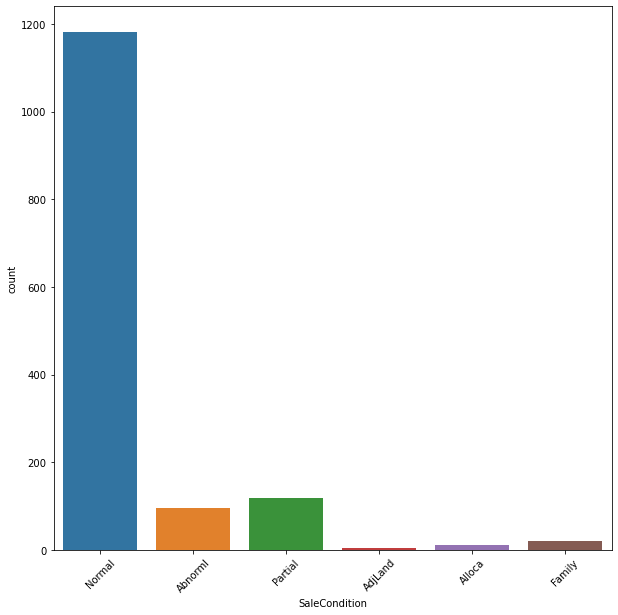

In [1748]:
for i in catvars:
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

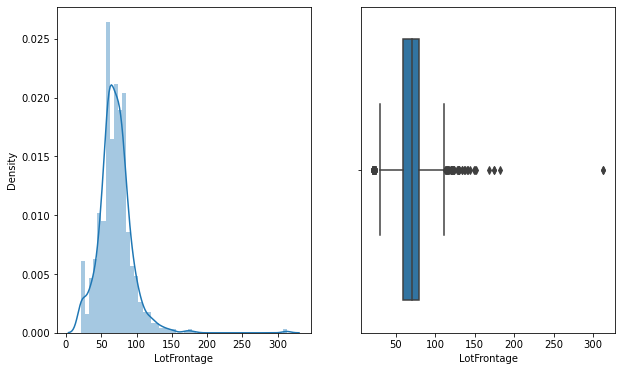

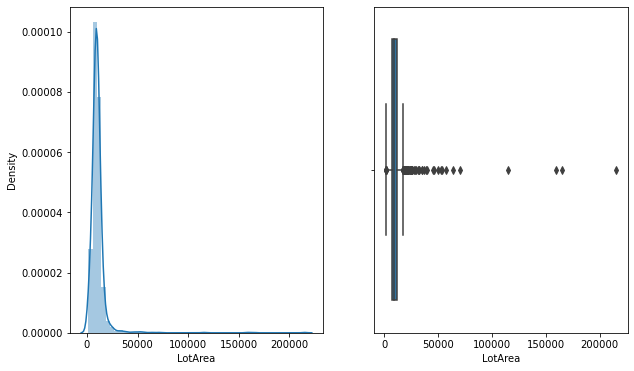

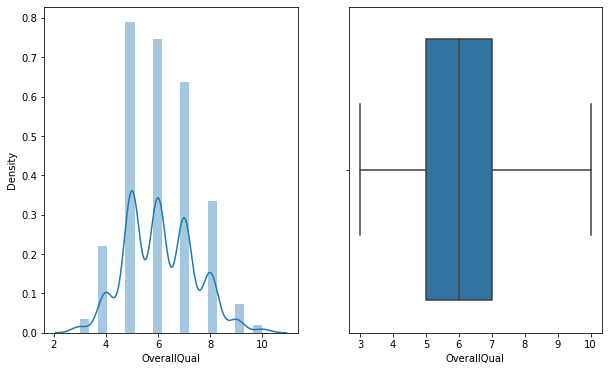

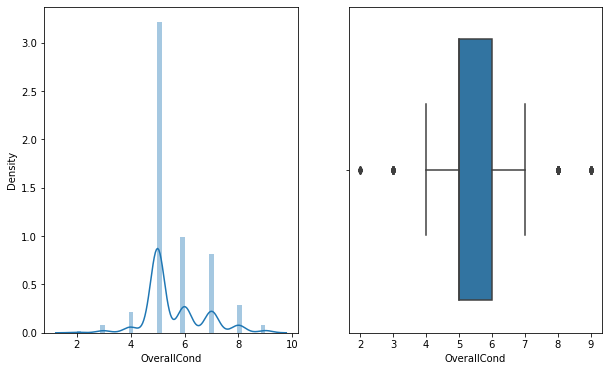

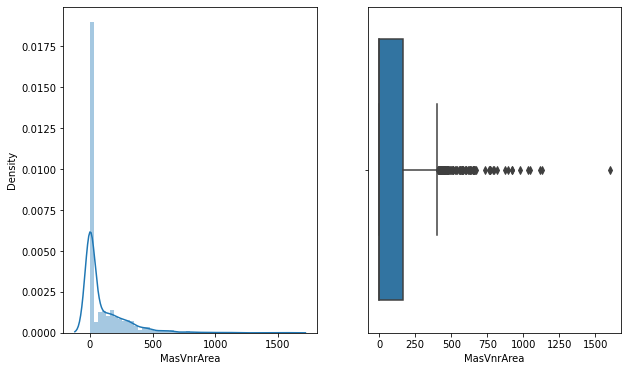

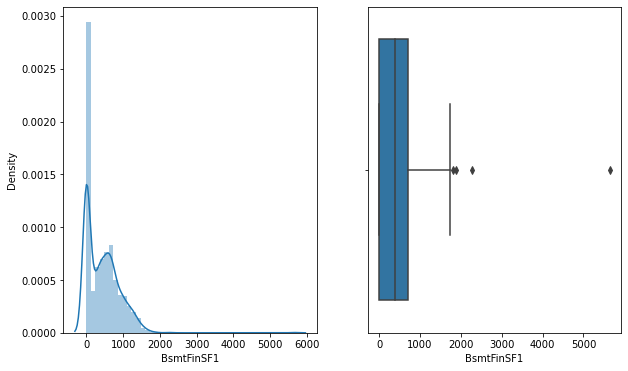

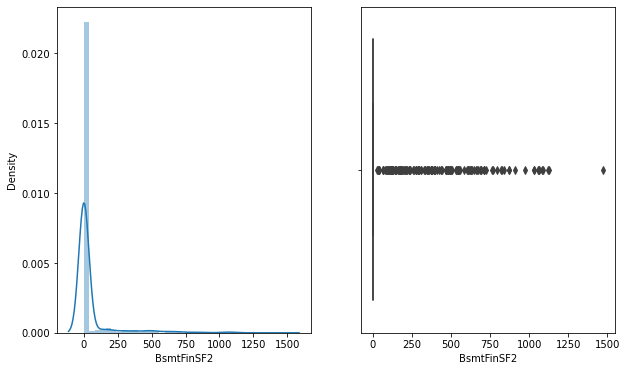

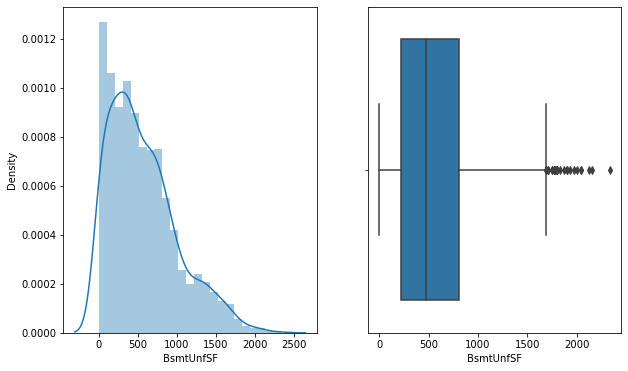

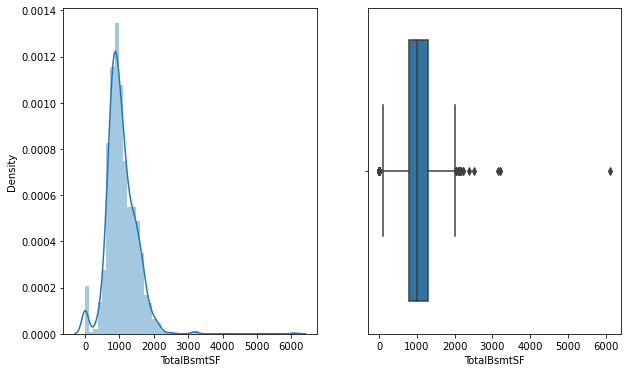

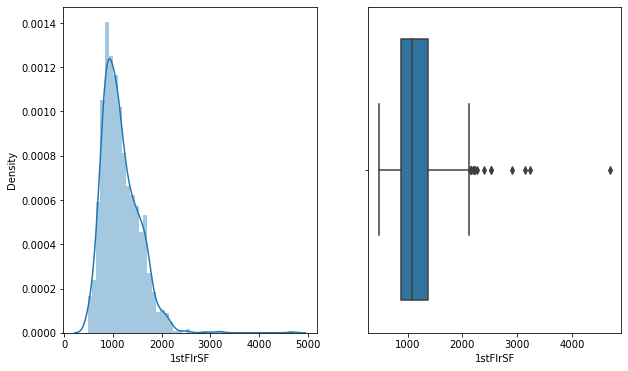

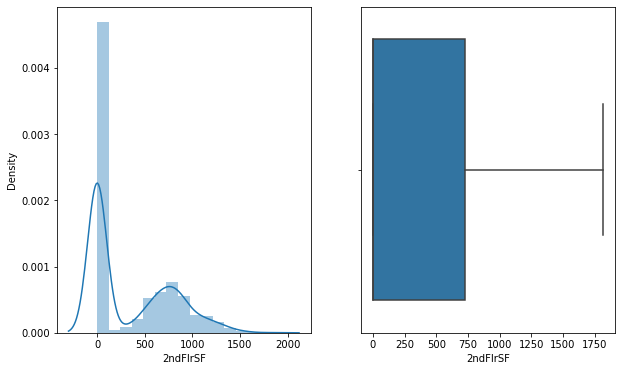

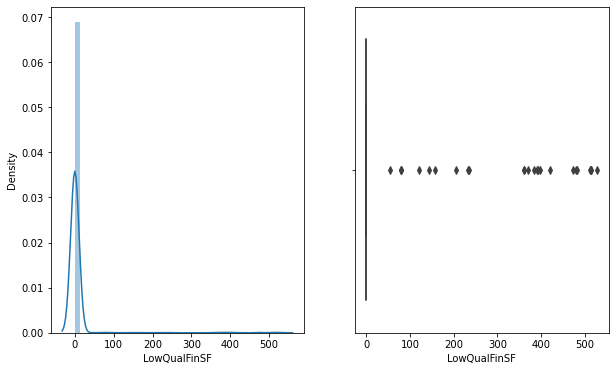

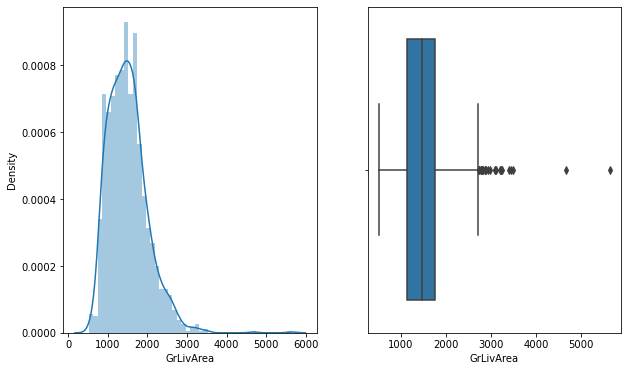

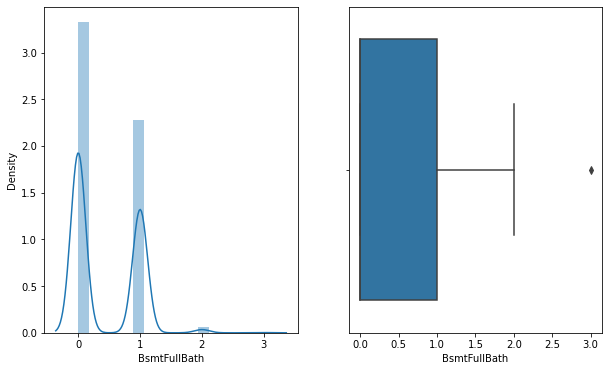

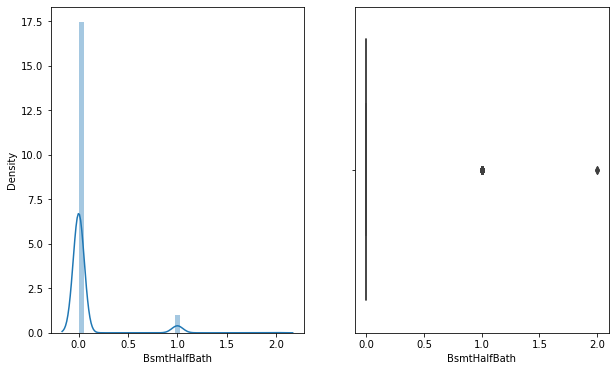

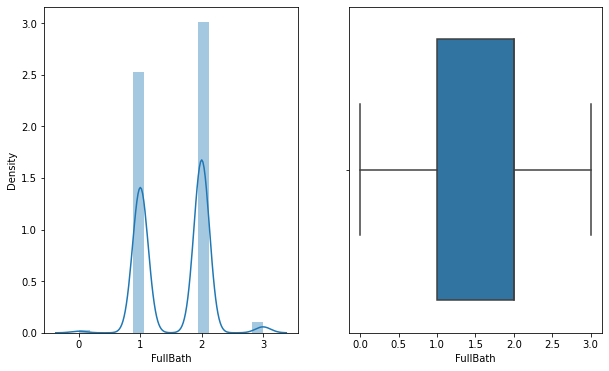

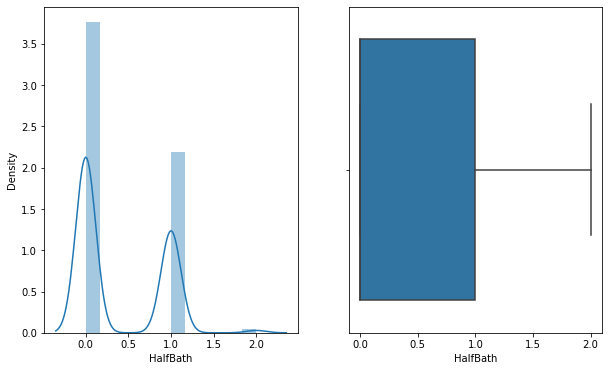

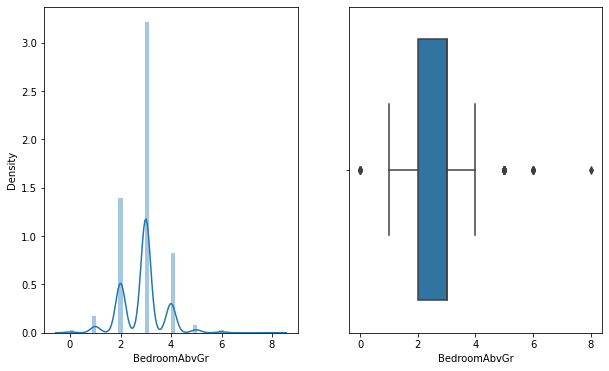

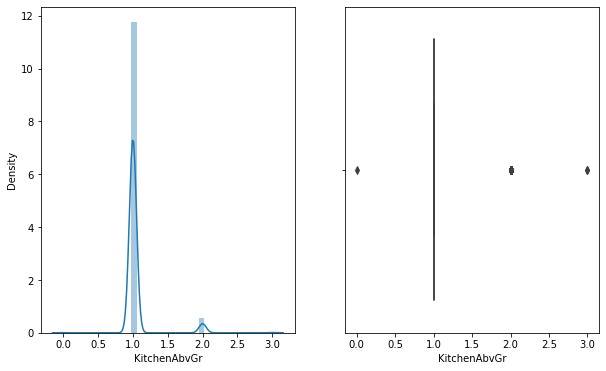

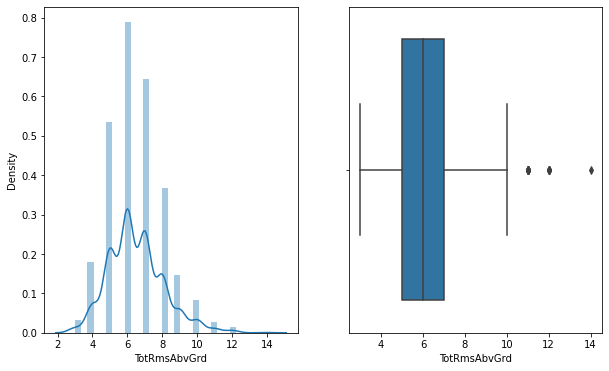

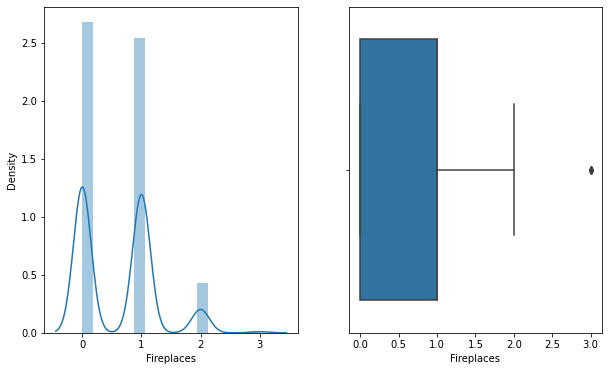

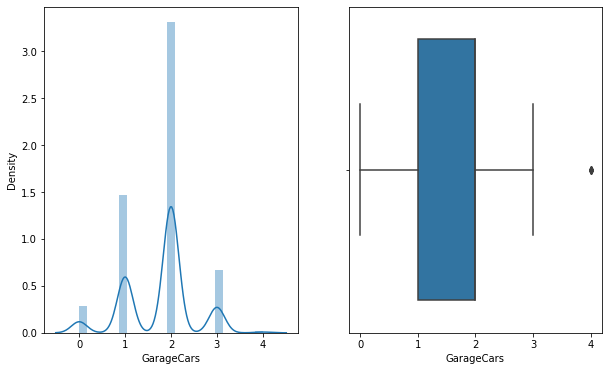

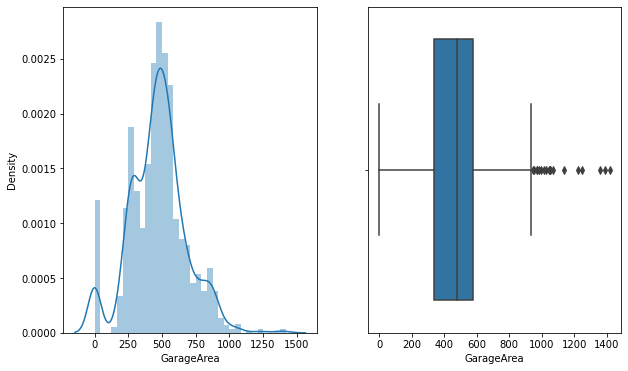

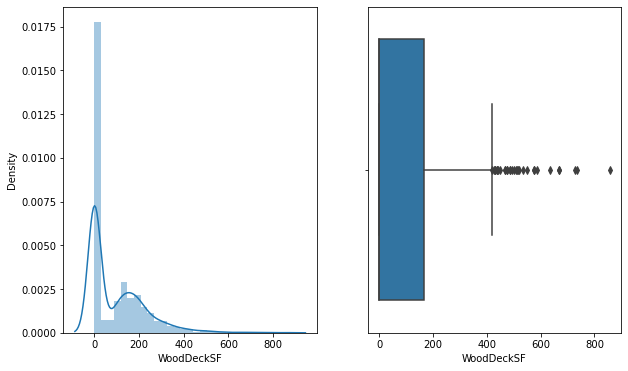

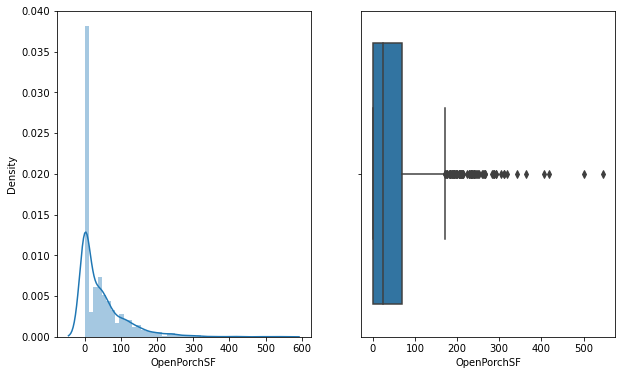

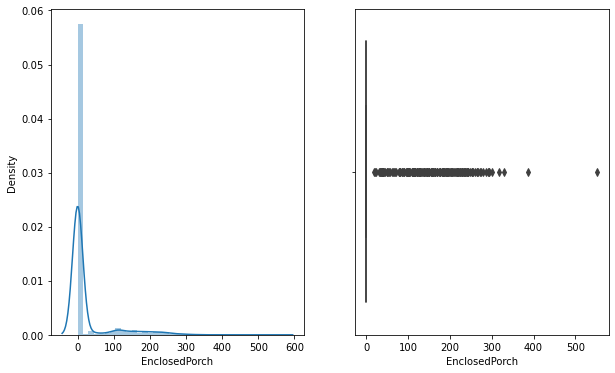

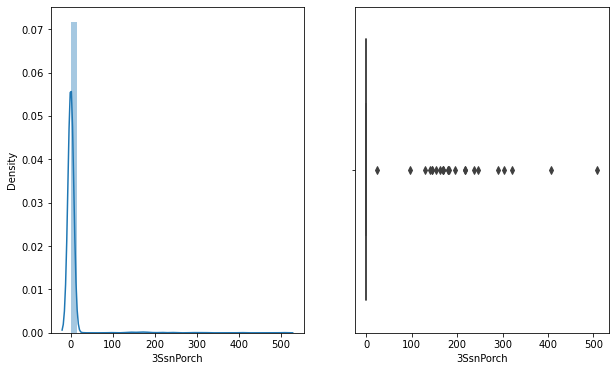

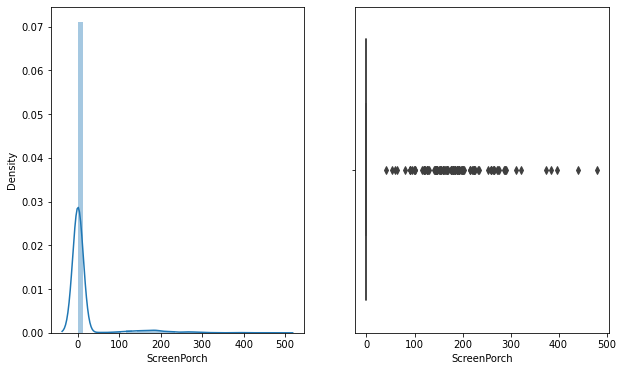

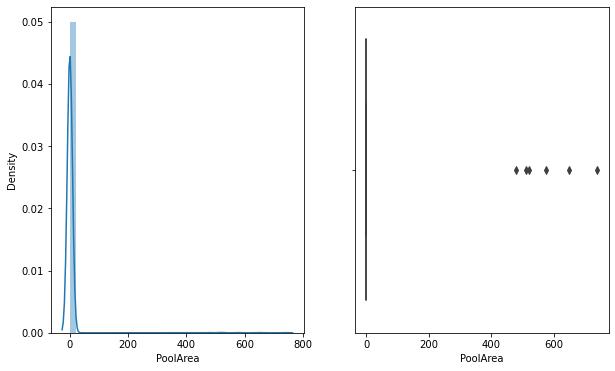

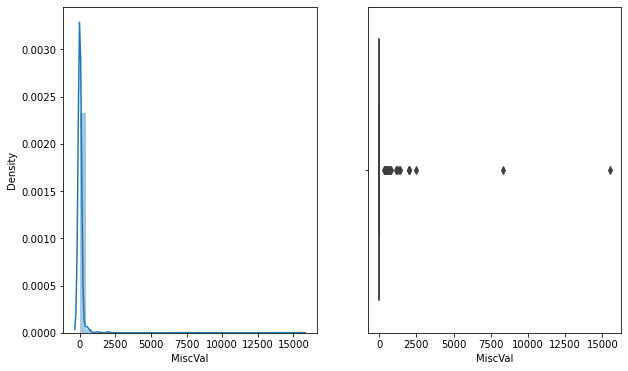

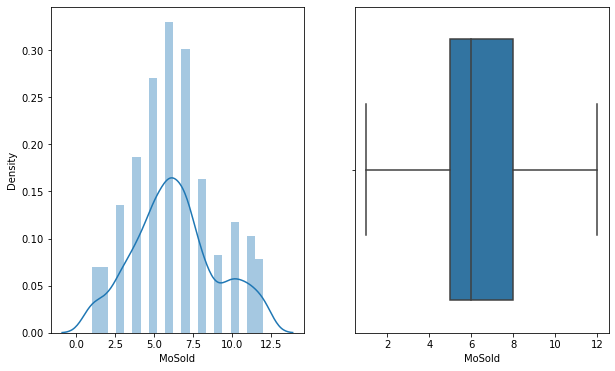

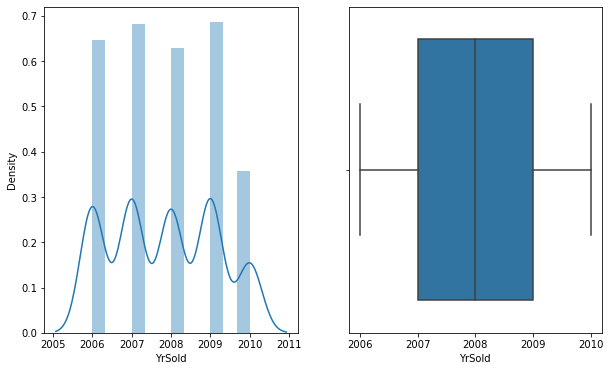

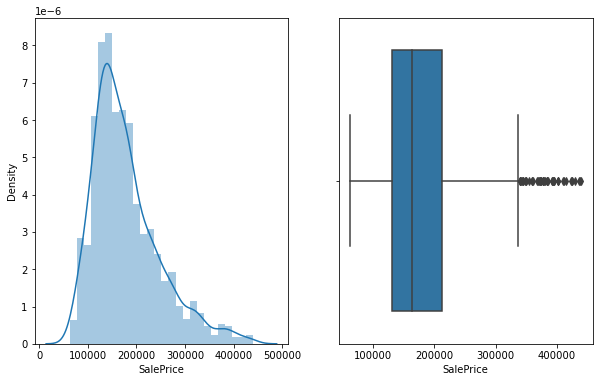

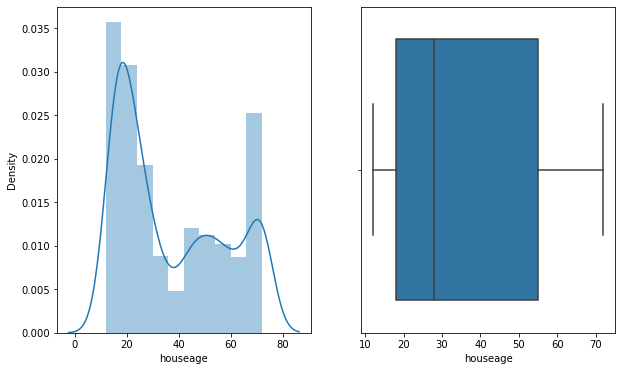

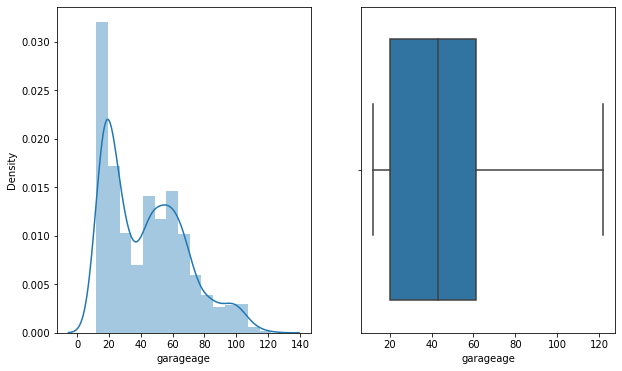

In [1749]:
for i in numvars:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[i])

    
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

In [1750]:
outliervars=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea",
             "WoodDeckSF","OpenPorchSF","SalePrice"]
for i in outliervars:
    third=np.percentile(df[i],75)
    first=np.percentile(df[i],25)
    iqr= third-first
    ub=third+1.5*iqr
    lb=first-1.5*iqr
    
    df[i]= np.where(df[i]>ub,ub,df[i])
    df[i]= np.where(df[i]<lb,lb,df[i])

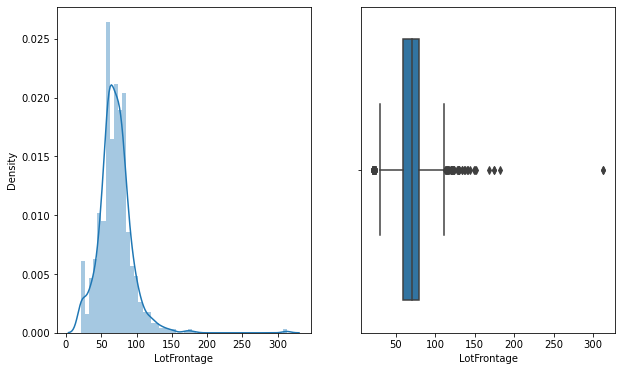

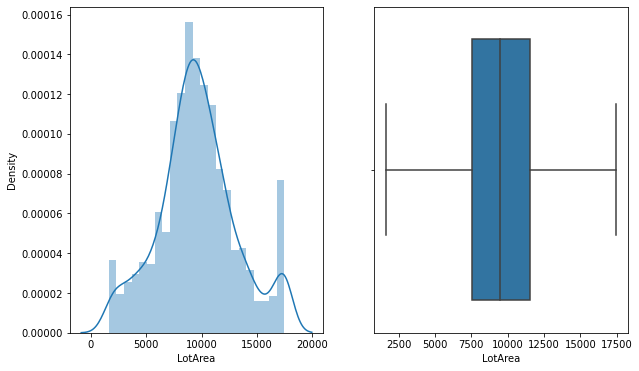

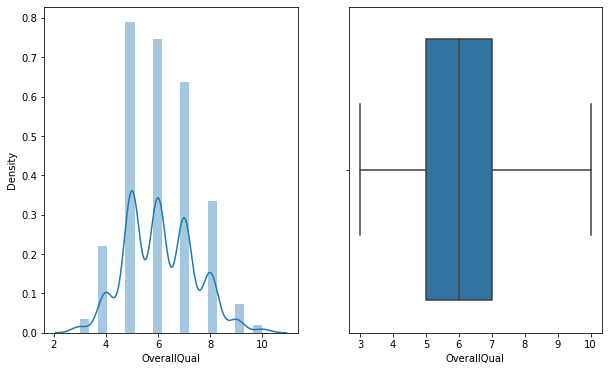

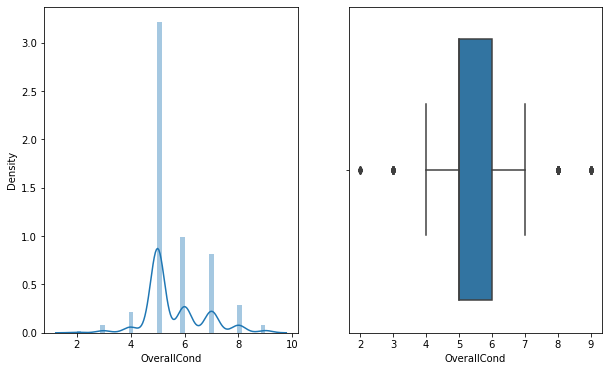

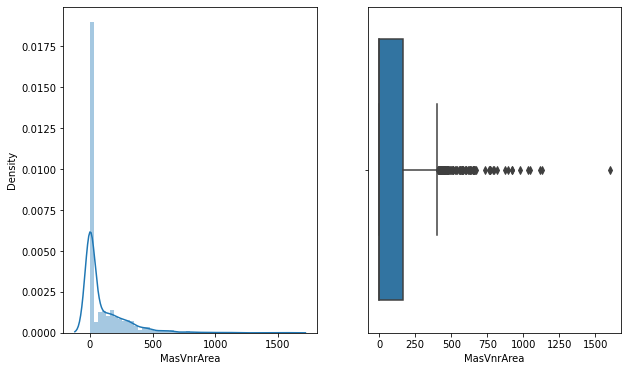

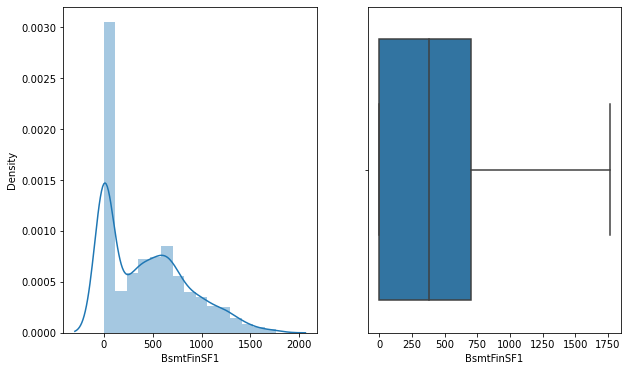

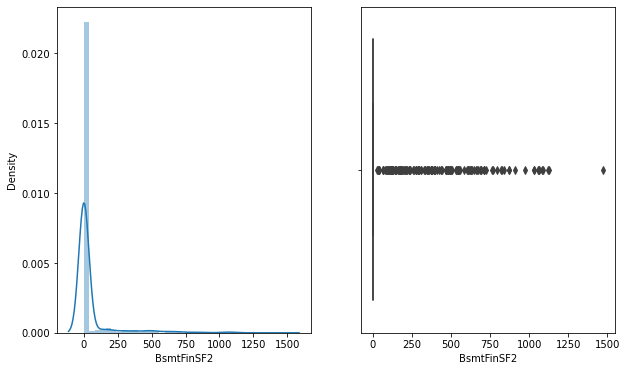

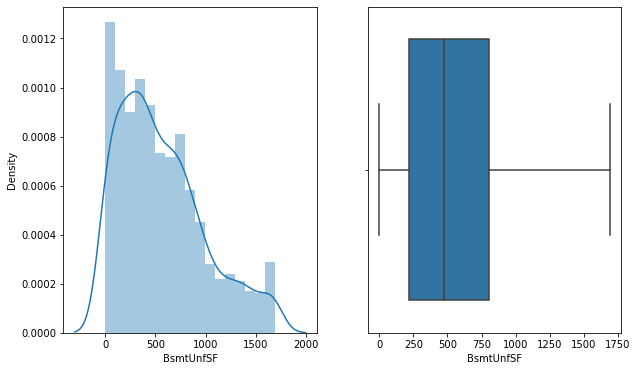

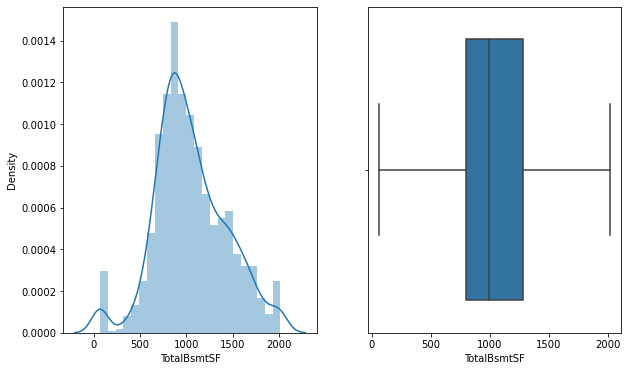

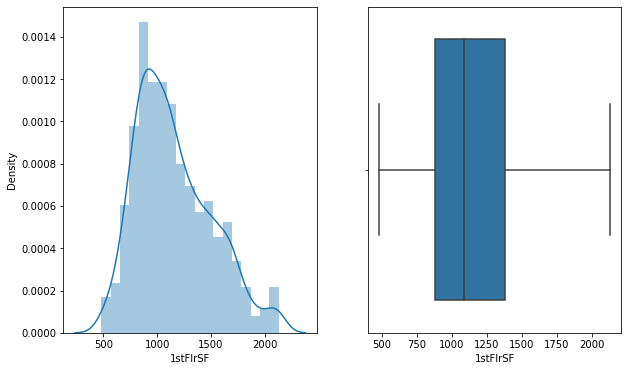

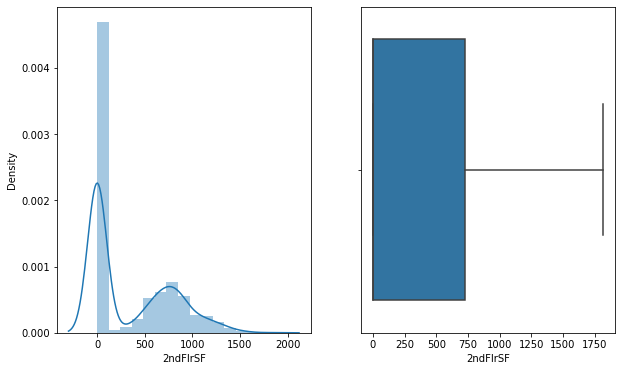

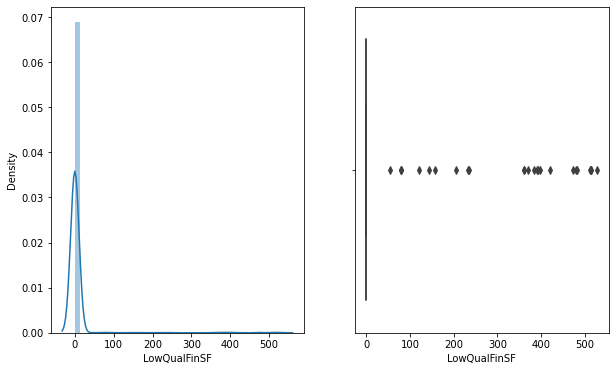

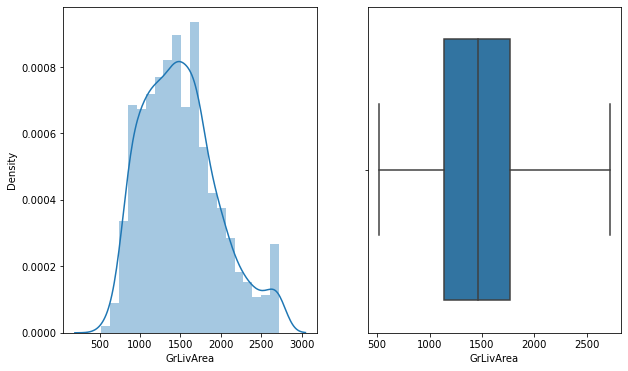

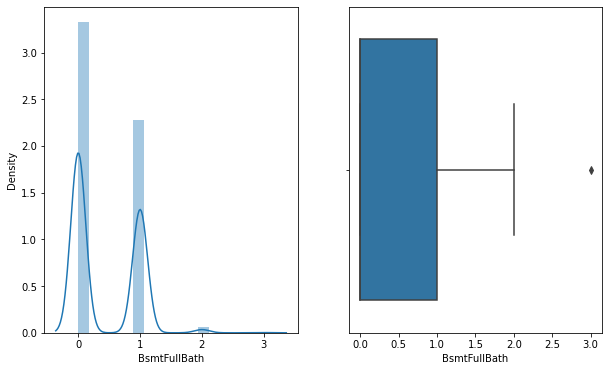

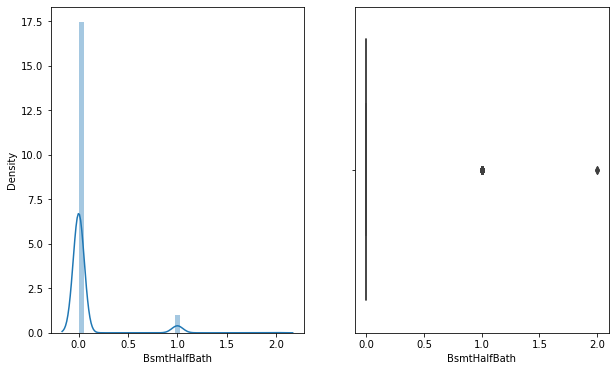

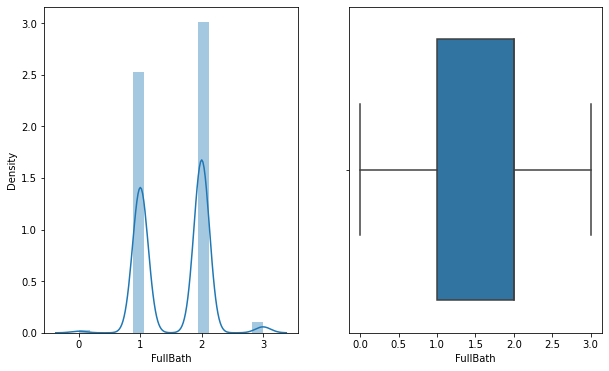

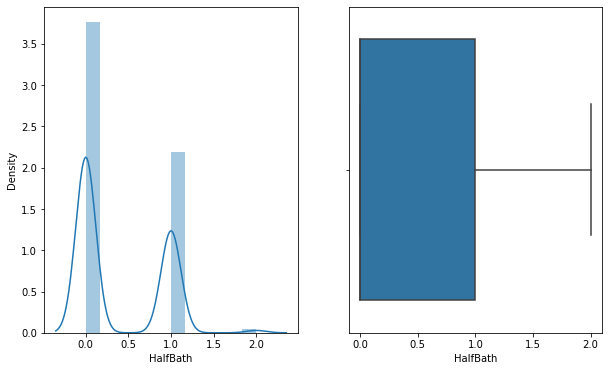

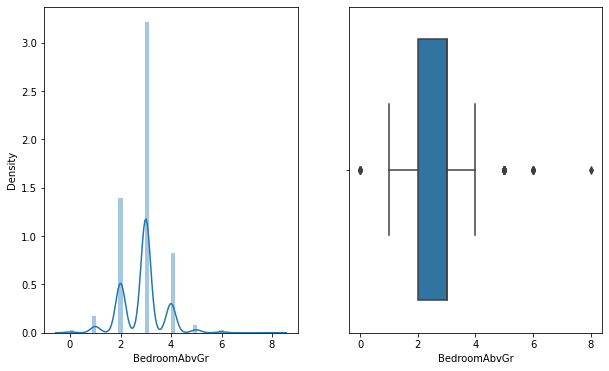

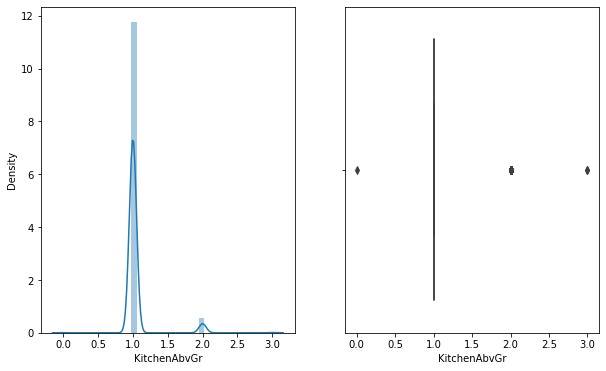

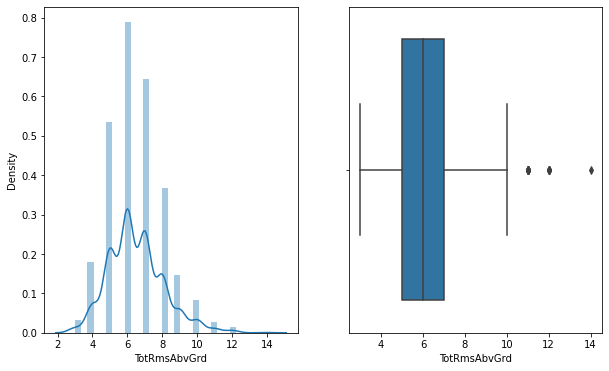

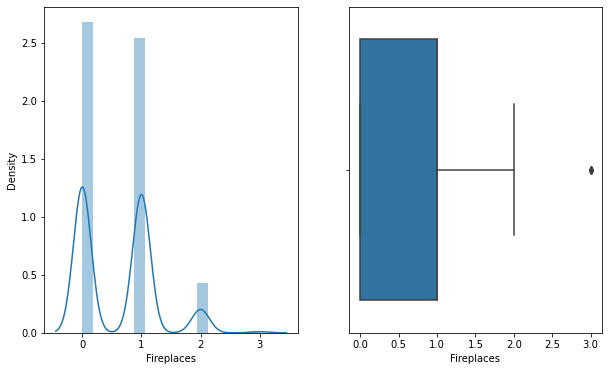

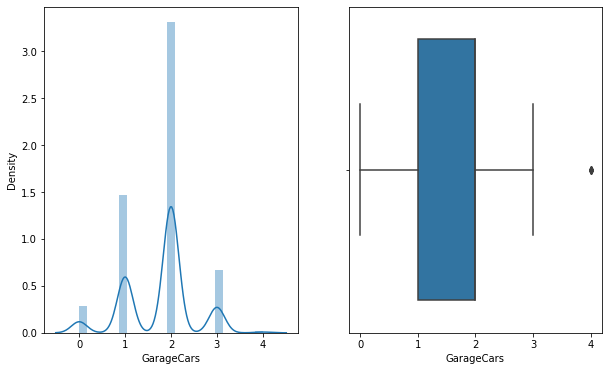

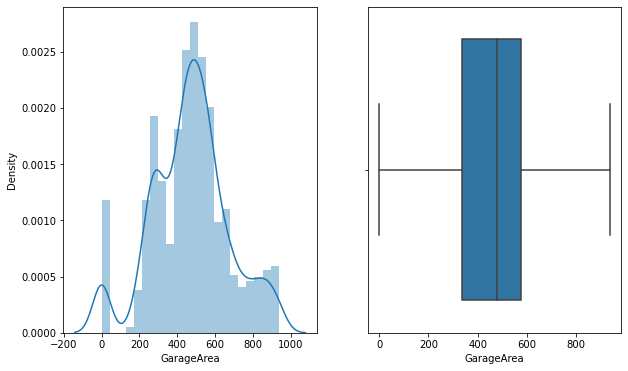

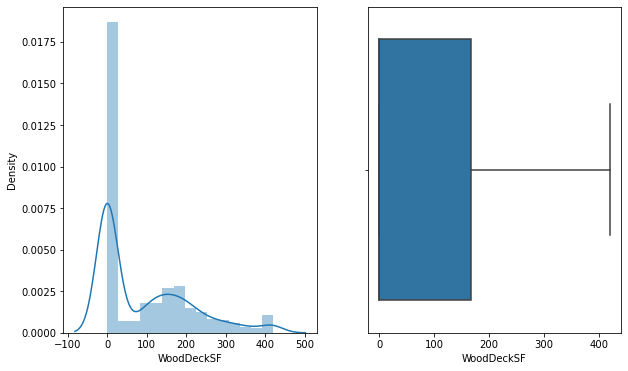

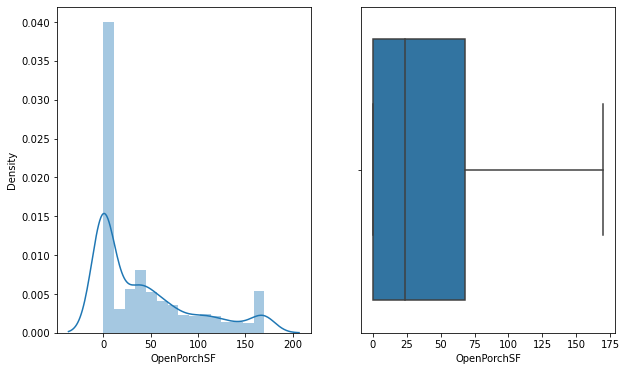

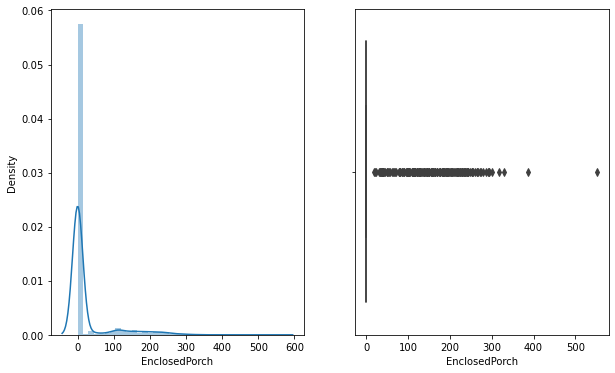

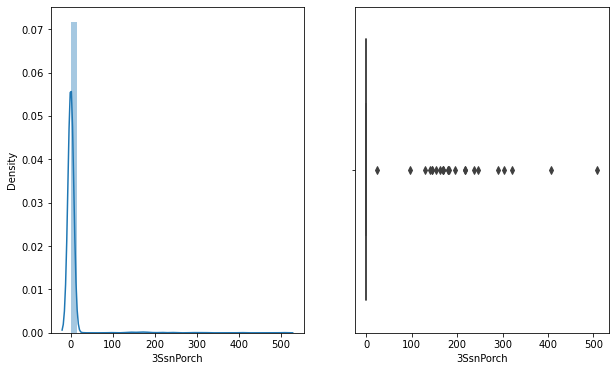

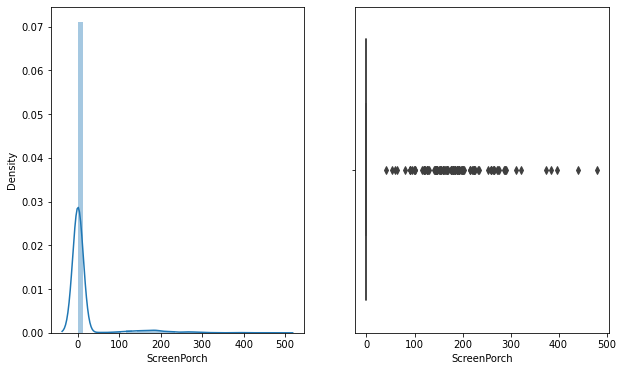

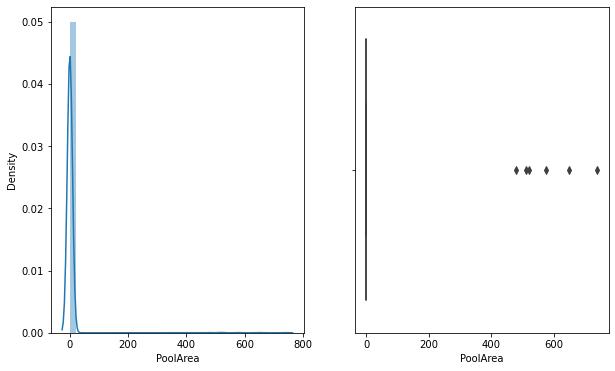

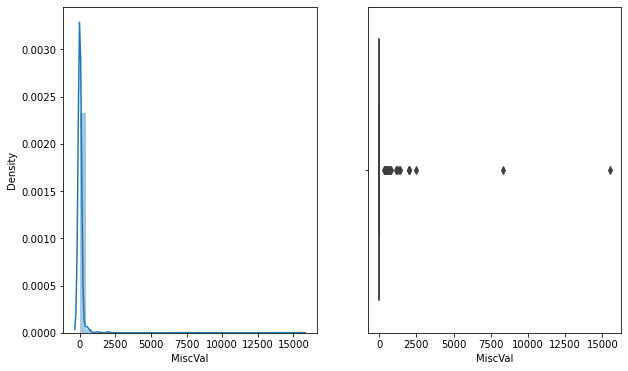

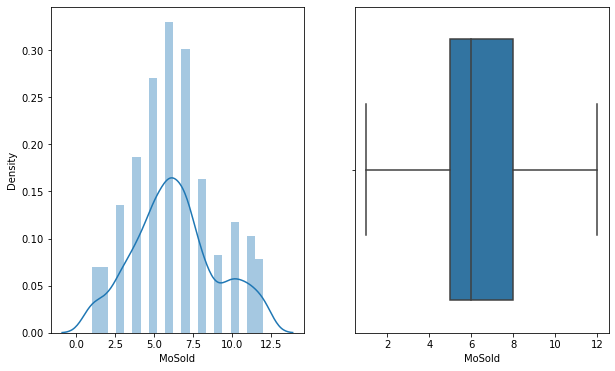

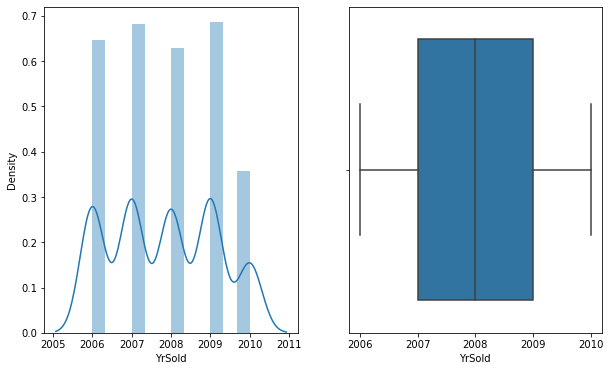

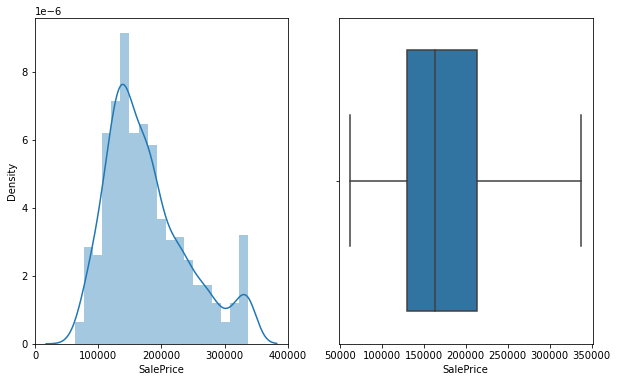

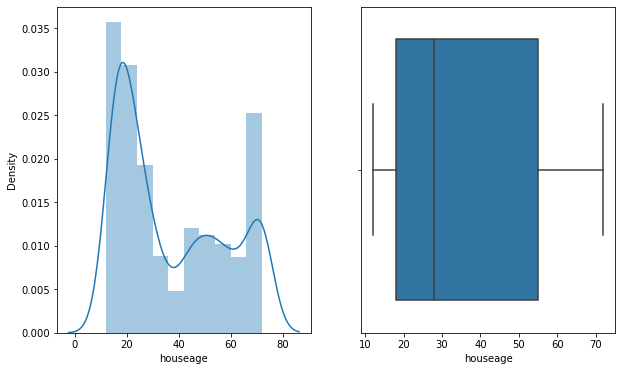

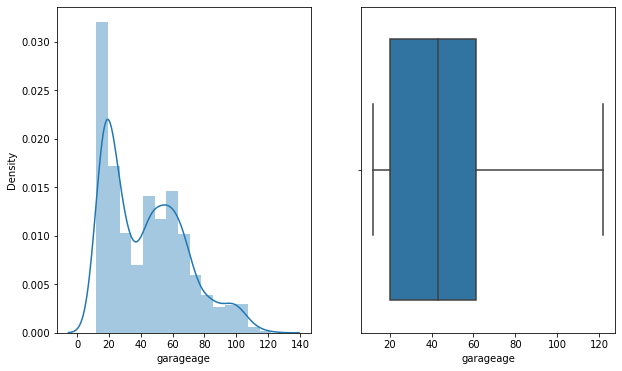

In [1751]:
for i in numvars:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[i])

    
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

In [1752]:
#now we have less no of outliers left

In [1753]:
### filling of missing values

for i in catvars:
    if(df[i].isnull().sum()>0):
        df[i]=df[i].fillna(df[i].mode()[0])
    
for i in numvars:
    if(df[i].isnull().sum()>0):
        df[i]=df[i].fillna(df[i].median())

### Bivariate Analysis

### continuous continuous analysis

In [1754]:
ppvar=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
      "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF"]


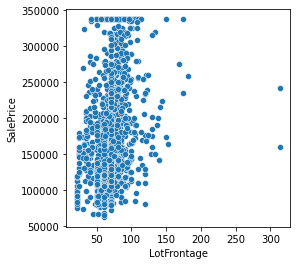

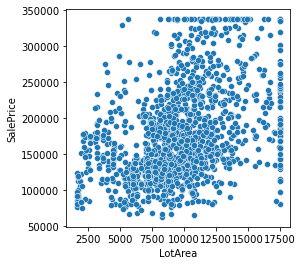

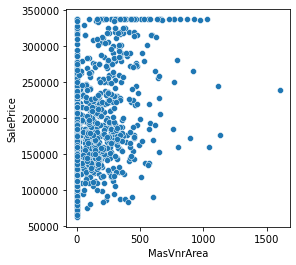

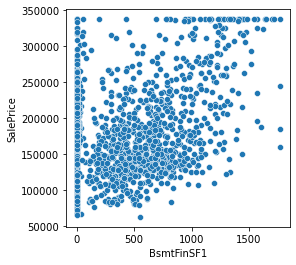

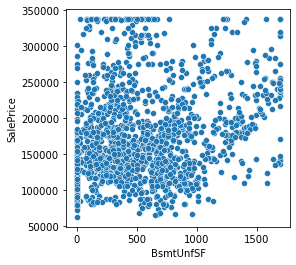

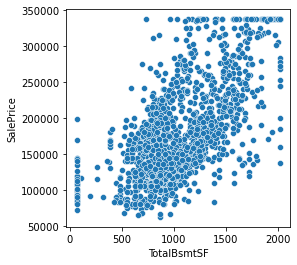

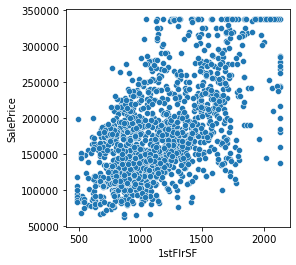

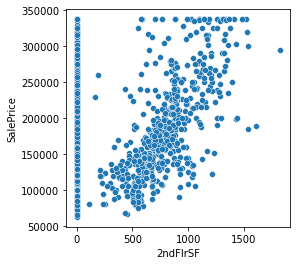

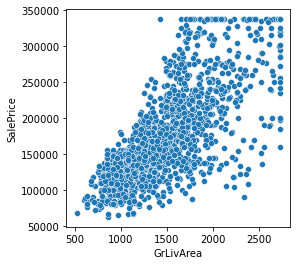

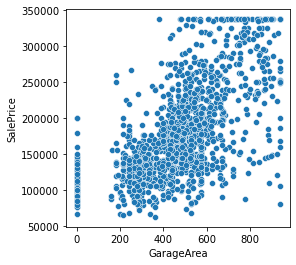

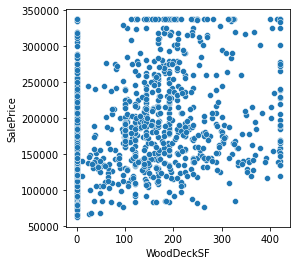

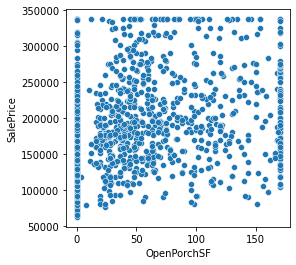

In [1755]:

for i in ppvar:
    plt.figure(figsize=(4,4))
    sns.scatterplot(df[i],df["SalePrice"])
    plt.show()

### Clearly some variables has linear sort of relationship.

### continuous categorical analysis

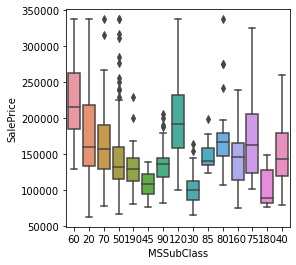

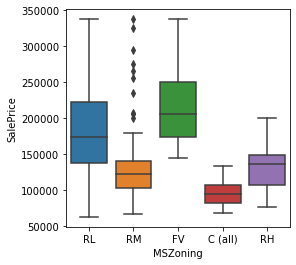

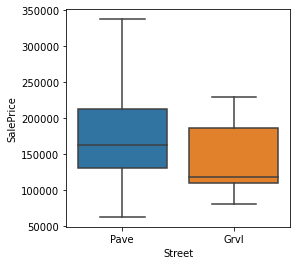

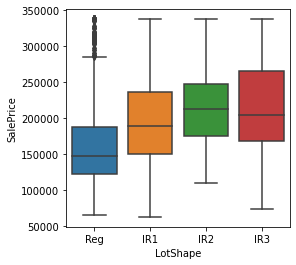

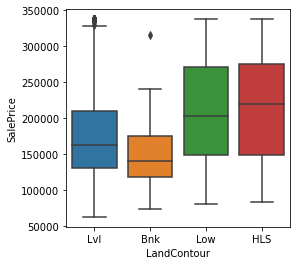

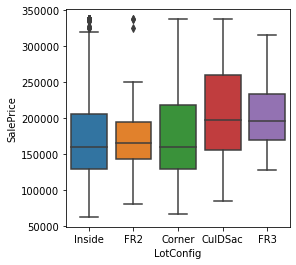

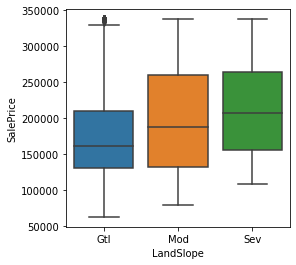

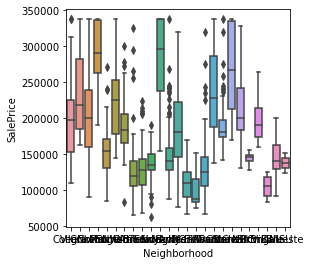

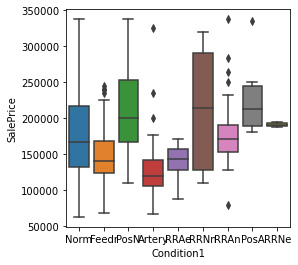

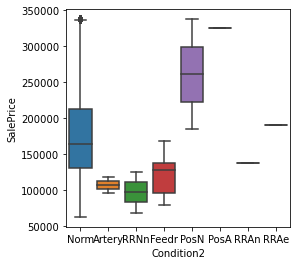

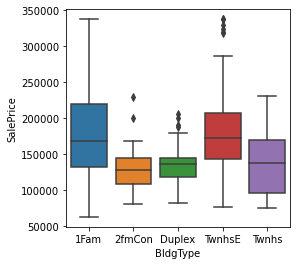

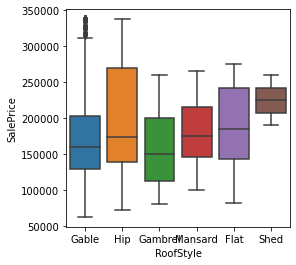

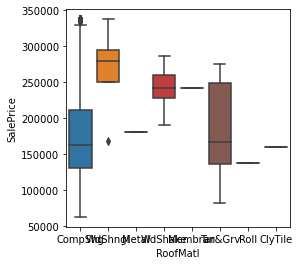

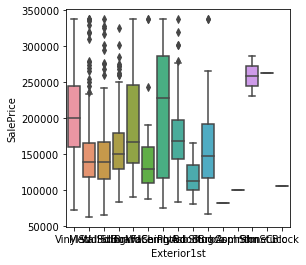

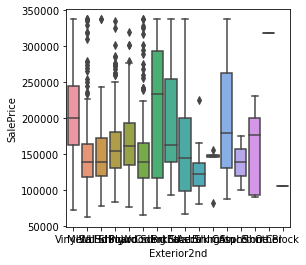

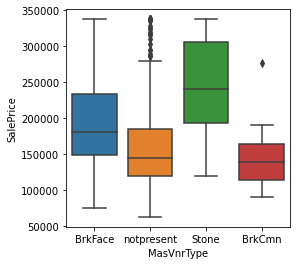

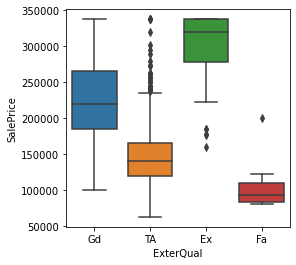

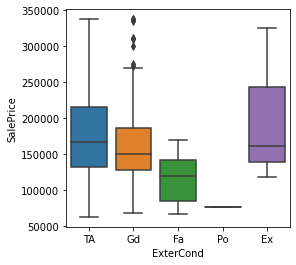

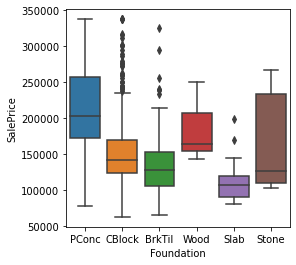

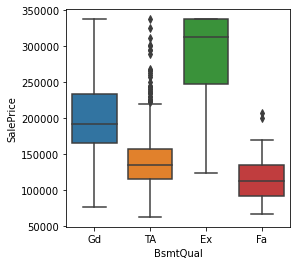

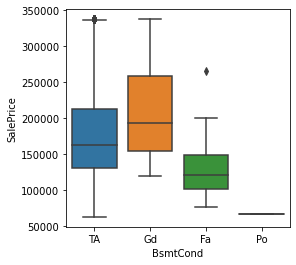

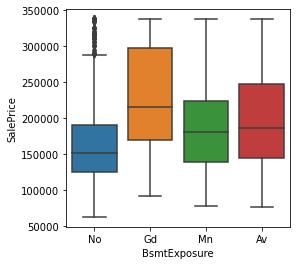

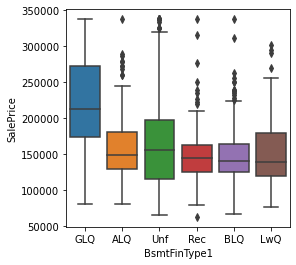

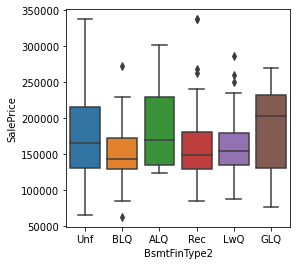

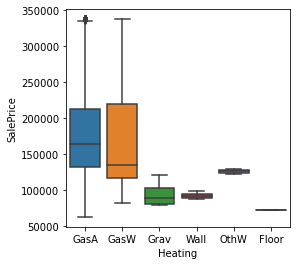

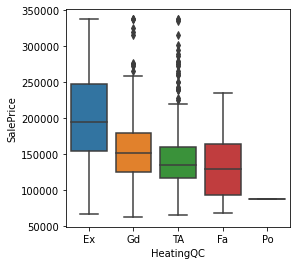

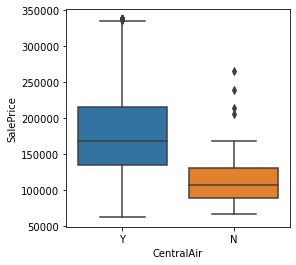

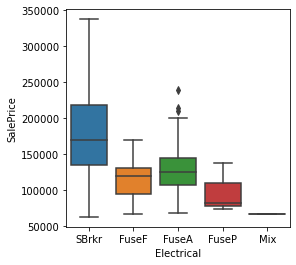

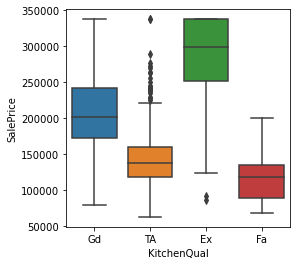

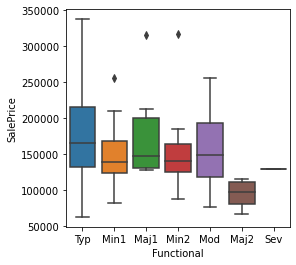

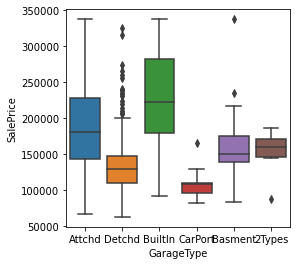

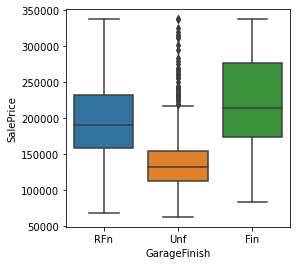

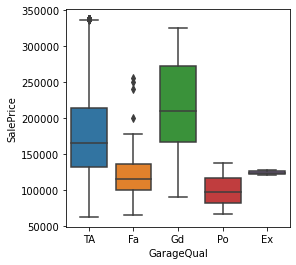

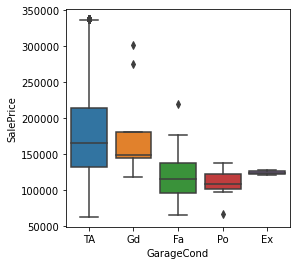

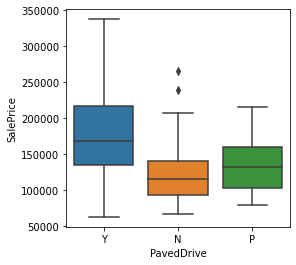

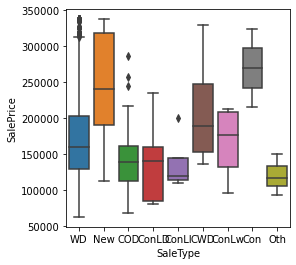

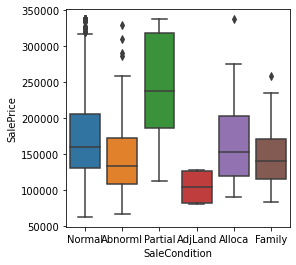

In [1757]:
for i in catvars:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i],df["SalePrice"])
    plt.show()

### Clearly in some variable median for each category varies a lot.

### Multivariate Analysis

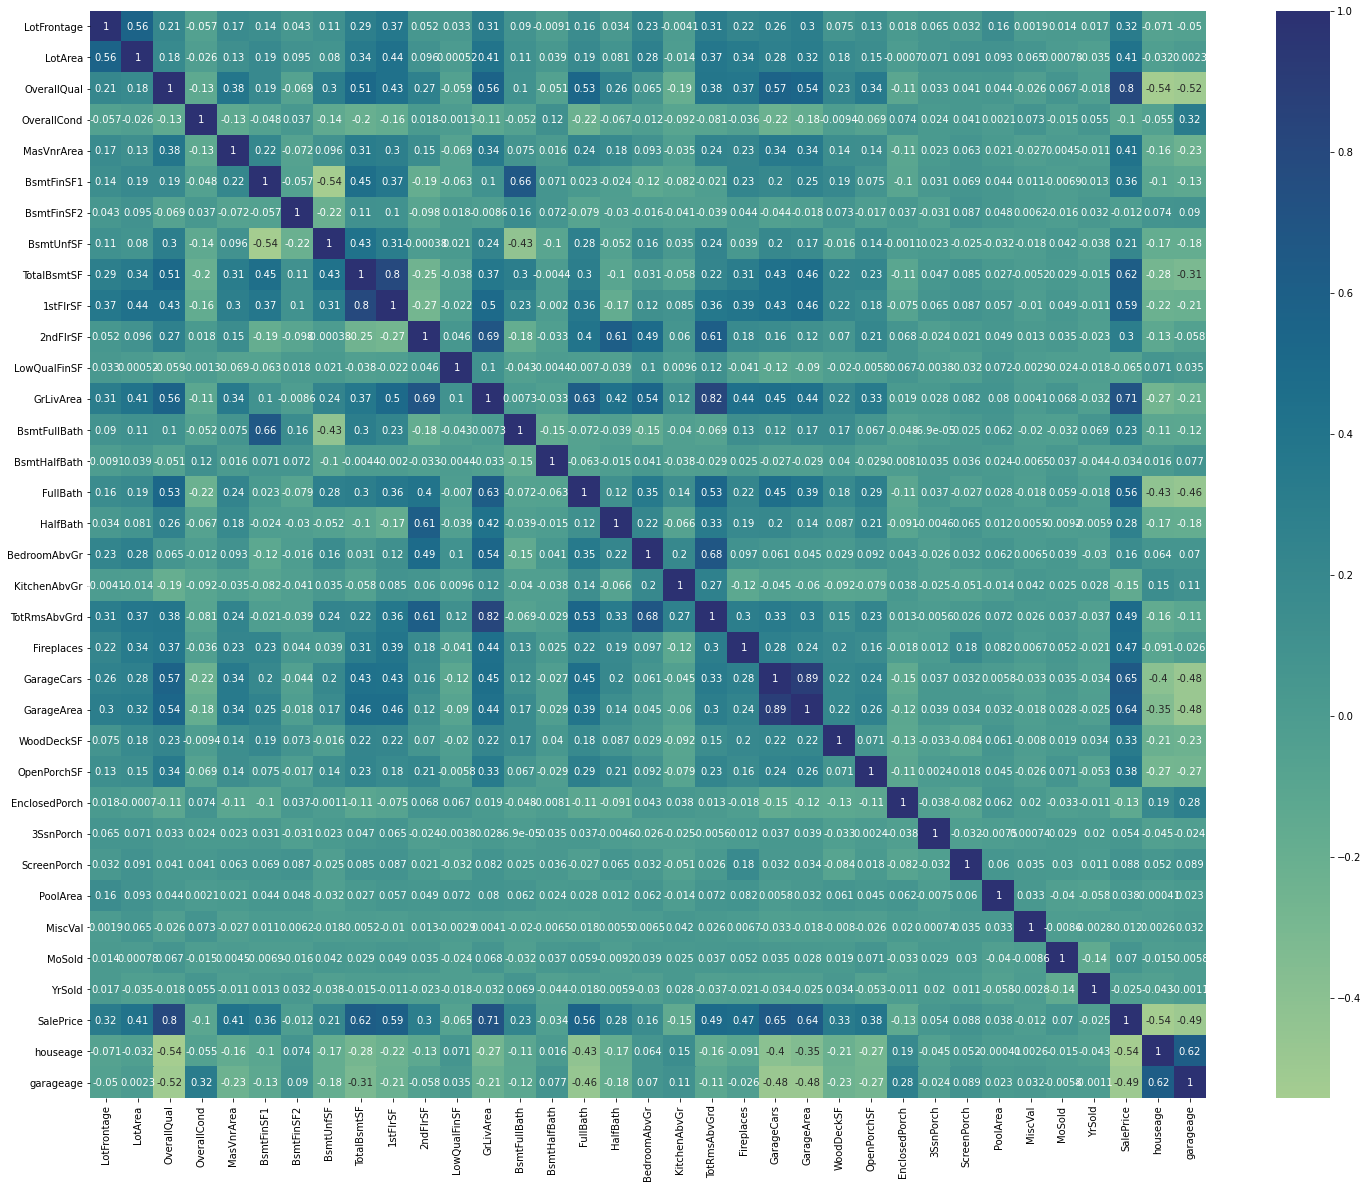

In [1758]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numvars].corr(),annot=True, cmap="crest")
plt.show()

In [1759]:
## clearly saleprice had high correlation with overallquality, grlivarea and garagearea.

### model Building

### OneHot Encoding

In [1760]:

df=pd.get_dummies(df,columns=catvars,drop_first=True)

In [1761]:
df.shape

(1430, 237)

In [1762]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [1763]:
len(numvars),len(catvars)

(35, 37)

In [1764]:
df_train.shape,type(df_train)

((1001, 237), pandas.core.frame.DataFrame)

In [1765]:
y_train=df_train["SalePrice"]
y_test=df_test["SalePrice"]

x_train=df_train.drop("SalePrice",axis=1)
x_test=df_test.drop("SalePrice",axis=1)

In [1766]:
type(x_train)

pandas.core.frame.DataFrame

In [1767]:
numvars

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'houseage',
 'garageage']

In [1768]:
numvars.remove("SalePrice")

In [1769]:
x_train[numvars]= scaler.fit_transform(x_train[numvars])
x_test[numvars]= scaler.fit_transform(x_test[numvars])

In [1770]:
print(type(x_train))
x_train

<class 'pandas.core.frame.DataFrame'>


LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  YrSold  houseage  garageage  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
582      0.205479  0.645936     0.428571     0.428571     0.06500    0.462323    0.000000   0.000000     0.384969  0.202309  0.000000           0.0   0.099828           0.5           0.0  0.333333       0.0         0.375      0.333333      0.181818    0.000000        0.00    0.000000    0.000000     0.188235       0.000000        0.0         0.00       0.0  0.000000  0.363636    0.25  0.333333   0.281818               0               0               0              0              0              0              0              0              0              0              0              0              0              1            0            0            1            0            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0   
825      0.318493  0.832719     1.000000     0.428571     0.51000    0.926912    0.000000   0.261597     1.000000  0.972661  0.000000           0.0   0.699746           0.5           0.0  0.666667       0.0         0.250      0.333333      0.363636    0.333333        0.75    1.000000    0.447619     0.264706       0.000000        0.0         0.00       0.0  0.000000  0.454545    0.50  0.033333   0.027273               0               0               0              1              0              0              0              0              0              0              0              0              0              0            0            0            1            0            1             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0   
1256     0.239726  0.801189     0.714286     0.428571     0.34625    0.744476    0.000000   0.397721     0.983129  0.913730  0.000000           0.0   0.653853           0.5           0.0  0.666667       0.0         0.250      0.333333      0.363636    0.333333        0.50    0.738248    0.623810     0.211765       0.000000        0.0         0.00       0.0  0.000000  0.636364    0.50  0.266667   0.145455               0               0               0              1              0              0              0              0              0              0              0              0              0              0            0            0            1            0            1             0             0             0                0                0                1                  0              0              0                 0              0              0                     0                    0                     0                     0                     0   
595      0.164384  0.611947     0.714286     0.428571 

In [1771]:
print(type(y_train))
y_train

<class 'pandas.core.series.Series'>


582     118500.0
825     337500.0
1256    301500.0
595     319000.0
1418    124000.0
          ...   
1118    140000.0
1153    120500.0
1320    156500.0
878     148000.0
1149    143000.0
Name: SalePrice, Length: 1001, dtype: float64

In [1772]:
clm=x_train.columns

In [1773]:
clm

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=236)

### Model1

In [1774]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [1775]:
di={}
di["metric"]=["r2","mae","mse","rmse"]

In [1776]:
y_test_pred=reg.predict(x_test)

In [1777]:
y_train_pred=reg.predict(x_train)

In [1778]:
r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5

In [1779]:
r2_train,mae_train,mse_train,rmse_train

(0.948218576066975, 10931.497502497503, 226258657.17582417, 15041.896728000234)

In [1780]:
a=[r2_train,mae_train,mse_train,rmse_train]
di["linear_train"]=a

In [1781]:
r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

In [1782]:
r2_test,mae_test,mse_test,rmse_test

(-6.87549129968755e+21,
 358710983269430.8,
 2.398175403605063e+31,
 4897116910596543.0)

In [1783]:
a=[r2_test,mae_test,mse_test,rmse_test]
di["linear_test"]=a

In [1784]:
regcof = reg.coef_

In [1785]:
### clearly its performing worse on test set that means using more than 200 feature it mugs up train data and overfit.

### Model2 using rfe select some feature and train on them.

In [1786]:

reg=LinearRegression()
reg.fit(x_train,y_train)
rfe=RFE(reg,n_features_to_select=40)
rfe=rfe.fit(x_train,y_train)

In [1787]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 196),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 127),
 ('BsmtFinSF2', False, 128),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 61),
 ('2ndFlrSF', False, 66),
 ('LowQualFinSF', False, 68),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 156),
 ('BsmtHalfBath', False, 190),
 ('FullBath', False, 157),
 ('HalfBath', False, 179),
 ('BedroomAbvGr', False, 118),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 70),
 ('Fireplaces', False, 26),
 ('GarageCars', True, 1),
 ('GarageArea', False, 25),
 ('WoodDeckSF', False, 75),
 ('OpenPorchSF', False, 117),
 ('EnclosedPorch', False, 176),
 ('3SsnPorch', False, 101),
 ('ScreenPorch', False, 42),
 ('PoolArea', False, 40),
 ('MiscVal', False, 152),
 ('MoSold', False, 185),
 ('YrSold', False, 183),
 ('houseage', True, 1),
 ('garageage', False, 150),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 165),

In [1788]:
newcol=x_train.columns[rfe.support_]

In [1789]:
newcol

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'houseage', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Other', 'Foundation_Wood', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseP', 'Functional_Sev', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'SaleType_Oth'], dtype='object')

In [1790]:
len(newcol)

40

### now lets train linear regression on it may be we observe less overfitting.

In [1791]:
x_train1=x_train[newcol]
x_test1=x_test[newcol]

In [1792]:
reg=LinearRegression()
reg.fit(x_train1,y_train)

LinearRegression()

In [1793]:
y_train_pred=reg.predict(x_train1)

In [1794]:
y_test_pred=reg.predict(x_test1)

In [1795]:
r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5

In [1796]:
r2_train,mae_train,mse_train,rmse_train

(0.9002951481645456, 15432.301531078767, 435659821.1625609, 20872.465622502794)

In [1797]:
a=[r2_train,mae_train,mse_train,rmse_train]
di["rfe_train"]=a

In [1798]:
r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

In [1799]:
r2_test,mae_test,mse_test,rmse_test

(0.637985145181184, 29736.33603281465, 1262709939.8781807, 35534.63014973113)

In [1800]:
a=[r2_test,mae_test,mse_test,rmse_test]
di["rfe_test"]=a

### Now it is less overfitting as we are getting decent value of r2 in test as well.

### Model3 and Model4 :Ridge and  Lasso Regression

In [1801]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1802]:
print(model_cv.best_params_)

{'alpha': 7.0}


In [1803]:
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridcof = ridge.coef_

In [1804]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

In [1805]:
r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5

In [1806]:
r2_train,mae_train,mse_train,rmse_train

(0.9272395459734029, 12496.378838312789, 317926417.876308, 17830.49124046525)

In [1807]:
a=[r2_train,mae_train,mse_train,rmse_train]
di["rid_train"]=a

In [1808]:
r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

In [1809]:
r2_test,mae_test,mse_test,rmse_test

(0.8872517665474717, 13968.32696220546, 393266500.501662, 19830.948048483766)

In [1810]:
a=[r2_test,mae_test,mse_test,rmse_test]
di["rid_test"]=a

### LASSO

In [1811]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1812]:
print(model_cv.best_params_)

{'alpha': 100}


In [1813]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train,y_train)
lascof = lasso.coef_

In [1814]:
y_train_ = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

In [1815]:
r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5

In [1816]:
r2_train,mae_train,mse_train,rmse_train

(0.9272395459734029, 12496.378838312789, 317926417.876308, 17830.49124046525)

In [1817]:
a=[r2_train,mae_train,mse_train,rmse_train]
di["las_train"]=a

In [1818]:
r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

In [1819]:
r2_test,mae_test,mse_test,rmse_test

(0.8934948405225113, 13455.334292055331, 371490621.8084448, 19274.091984019502)

In [1820]:
a=[r2_test,mae_test,mse_test,rmse_test]
di["las_test"]=a

### corresponding coefficients

In [1821]:
coefdata=pd.DataFrame({"columns":x_train.columns,"linear":regcof,"ridge":ridcof,"lasso":lascof})

In [1822]:
coefdata.shape

(236, 4)

In [1823]:
coefdata.head(236)

columns        linear         ridge         lasso
0              LotFrontage  1.465683e+02  -9105.821952  -3371.272847
1                  LotArea  2.794657e+04  23348.187466  25394.089550
2              OverallQual  5.029433e+04  37724.737744  60481.959065
3              OverallCond  3.251852e+04  22196.019358  28911.850069
4               MasVnrArea  5.506430e+03   3508.546246      0.000000
5               BsmtFinSF1 -2.618802e+03  16132.680042  21231.310792
6               BsmtFinSF2 -4.555102e+03   3570.702381      0.000000
7                BsmtUnfSF -2.617926e+04  -1696.280073   -344.858318
8              TotalBsmtSF  6.619317e+04  23852.381400  20497.373648
9                 1stFlrSF -3.390890e+04  25519.692131      0.000000
10                2ndFlrSF -1.595490e+04  22361.435936      0.000000
11            LowQualFinSF -2.092103e+04  -2407.506270  -2055.352008
12               GrLivArea  1.363219e+05  47070.373756  95068.445069
13            BsmtFullBath  2.536327e+03   3557.639550   2850.289345
14            BsmtHalfBath -4.419994e+02   -882.220520     -0.000000
15                FullBath  4.105757e+03   6818.490928     -0.000000
16                HalfBath  1.711859e+03   5187.906581    721.856532
17            BedroomAbvGr  8.143563e+03   5020.120875     -0.000000
18            KitchenAbvGr -2.202098e+04  -6622.009494     -0.000000
19            TotRmsAbvGrd -1.603769e+04   4903.808259     -0.000000
20              Fireplaces  1.041854e+04  13042.426369  11934.809897
21              GarageCars  1.739253e+04  18747.380762  22869.348487
22              GarageArea  1.736251e+04  19193.410477  14444.495978
23              WoodDeckSF  8.422219e+03  10124.090339   9196.017033
24             OpenPorchSF  4.215095e+03   5245.364358   3729.693953
25           EnclosedPorch -1.688756e+03   4151.241154      0.000000
26               3SsnPorch  5.491422e+03   3897.390382      0.000000
27             ScreenPorch  1.554602e+04  10840.892583   8615.894559
28                PoolArea  6.021605e+04  -5541.555341     -0.000000
29                 MiscVal  9.254888e+03    898.778183     -0.000000
30                  MoSold  8.246833e+02   3676.684918   2414.063395
31                  YrSold -8.692124e+02   -734.527148     -0.000000
32                houseage -9.547858e+03  -9132.883176  -7291.832927
33               garageage  4.287472e+03   4109.621157     -0.000000
34          MSSubClass_160 -1.174991e+04  -6553.634515  -7930.197366
35          MSSubClass_180  4.033772e+03  -1694.810068     -0.000000
36          MSSubClass_190  9.567926e+02  -2875.370892  -3089.260015
37           MSSubClass_20 -1.772498e+03   5859.031592   8408.714800
38           MSSubClass_30 -9.093647e+03  -4593.273574     -0.000000
39           MSSubClass_40 -3.154699e+03   2058.057746      0.000000
40           MSSubClass_45 -1.413070e+03    644.545599      0.000000
41           MSSubClass_50 -8.386147e+03   1224.247860      0.000000
42           MSSubClass_60 -9.865316e+03   4345.854187   3231.889384
43           MSSubClass_70 -1.739379e+04   1584.931287  -2084.962452
44           MSSubClass_75 -1.500775e+04   7258.075391      0.000000
45           MSSubClass_80 -4.638076e+03   1855.708851   1322.390264
46           MSSubClass_85 -3.802780e+03   1746.748630      0.000000
47           MSSubClass_90  1.853214e+16  -3445.016314   -851.793330
48             MSZoning_FV  4.154466e+04   8409.085846   3575.540385
49             MSZoning_RH  3.036374e+04   1227.891361     -0.000000
50             MSZoning_RL  2.983730e+04   5046.521771   5301.891366
51             MSZoning_RM  2.433328e+04  -1380.961081     -0.000000
52             Street_Pave  9.218639e+03   6891.777299      0.000000
53            LotShape_IR2  2.011507e+03   1751.663049      0.000000
54            LotShape_IR3 -1.124699e+03 -11979.755494 -10748.172577
55            LotShape_Reg  1.926951e+03    231.227505      0.000000
56         LandContour_HLS  5.548413e+03  10268.071401   6726.457189
57         LandCo

In [1824]:
metrics=pd.DataFrame(di)
metrics

metric  linear_train   linear_test     rfe_train      rfe_test     rid_train      rid_test     las_train      las_test
0     r2  9.482186e-01 -6.875491e+21  9.002951e-01  6.379851e-01  9.272395e-01  8.872518e-01  9.272395e-01  8.934948e-01
1    mae  1.093150e+04  3.587110e+14  1.543230e+04  2.973634e+04  1.249638e+04  1.396833e+04  1.249638e+04  1.345533e+04
2    mse  2.262587e+08  2.398175e+31  4.356598e+08  1.262710e+09  3.179264e+08  3.932665e+08  3.179264e+08  3.714906e+08
3   rmse  1.504190e+04  4.897117e+15  2.087247e+04  3.553463e+04  1.783049e+04  1.983095e+04  1.783049e+04  1.927409e+04

### Clearly lasso is performing btr than ridge as it has slightly high r square and low rmse.

### since lasso is performing best in all we will do feature selection according to it

In [1825]:
coefdata.sort_values(by='lasso',ascending=False, key=abs)

columns        linear         ridge         lasso
12               GrLivArea  1.363219e+05  47070.373756  95068.445069
2              OverallQual  5.029433e+04  37724.737744  60481.959065
100        Condition2_PosN -1.089591e+05 -18295.134517 -35820.221353
3              OverallCond  3.251852e+04  22196.019358  28911.850069
1                  LotArea  2.794657e+04  23348.187466  25394.089550
21              GarageCars  1.739253e+04  18747.380762  22869.348487
80    Neighborhood_NridgHt  1.479075e+04  18981.291773  21467.939158
5               BsmtFinSF1 -2.618802e+03  16132.680042  21231.310792
79    Neighborhood_NoRidge  1.542151e+04  19330.771067  20820.962227
8              TotalBsmtSF  6.619317e+04  23852.381400  20497.373648
86    Neighborhood_StoneBr  1.682812e+04  16845.604908  18050.662175
85    Neighborhood_Somerst  4.746014e+02  10439.989510  16819.959137
22              GarageArea  1.736251e+04  19193.410477  14444.495978
122    Exterior1st_BrkFace  8.325492e+03  12674.115751  14286.091096
70    Neighborhood_Crawfor  7.009667e+03  12771.397174  12768.647971
20              Fireplaces  1.041854e+04  13042.426369  11934.809897
166            BsmtQual_TA -1.260869e+04 -13933.976617 -11572.342131
205         Functional_Typ  1.539919e+04  10777.543757  11380.742254
165            BsmtQual_Gd -1.214286e+04 -12328.391583 -10771.594634
199         KitchenQual_TA -1.566926e+04 -13443.420330 -10766.093323
54            LotShape_IR3 -1.124699e+03 -11979.755494 -10748.172577
90         Condition1_Norm  1.642350e+04   8717.271863   9492.878983
23              WoodDeckSF  8.422219e+03  10124.090339   9196.017033
71    Neighborhood_Edwards -1.858900e+04 -13205.335741  -8797.179763
170        BsmtExposure_Gd  7.995472e+03   7750.099706   8773.426006
27             ScreenPorch  1.554602e+04  10840.892583   8615.894559
37           MSSubClass_20 -1.772498e+03   5859.031592   8408.714800
34          MSSubClass_160 -1.174991e+04  -6553.634515  -7930.197366
32                houseage -9.547858e+03  -9132.883176  -7291.832927
234   SaleCondition_Normal  1.129865e+04   9160.467185   7030.273268
228           SaleType_New  1.159392e+04   4833.120731   6940.949079
56         LandContour_HLS  5.548413e+03  10268.071401   6726.457189
75    Neighborhood_Mitchel -1.902783e+04 -12040.885906  -6592.102497
63           LandSlope_Mod  1.372495e+04   9207.814675   6498.181701
76      Neighborhood_NAmes -1.858116e+04 -10587.987067  -6384.412526
81    Neighborhood_OldTown -1.416171e+04  -6624.982713  -6113.952132
198         KitchenQual_Gd -1.411242e+04  -8820.167204  -5986.167372
82      Neighborhood_SWISU -2.011272e+04  -8263.687176  -5780.707097
93         Condition1_RRAe -1.165868e+04  -9395.477711  -5747.035679
154           ExterQual_TA -3.035390e+03  -7357.398371  -5732.675454
214          GarageQual_Gd  3.902379e+16   9789.432130   5672.886623
98         Condition2_Norm  3.338684e+03  10060.824895   5585.107125
58         LandContour_Lvl  5.642027e+03   8187.225652   5407.494831
138    Exterior2nd_CmentBd  3.873059e+04   6089.718844   5399.757239
50             MSZoning_RL  2.983730e+04   5046.521771   5301.891366
78     Neighborhood_NWAmes -2.027661e+04  -8897.614308  -4414.883189
113       RoofMatl_CompShg  2.445553e+05   7473.891797   4345.446386
68    Neighborhood_ClearCr -7.201936e+03   3612.496730   4320.846645
222           PavedDrive_Y  4.875468e+03   3823.360621   4268.191794
125    Exterior1st_HdBoard -1.595562e+04  -6865.344970  -4178.378800
164            BsmtQual_Fa -1.014241e+04  -8326.278031  -3925.083865
59       LotConfig_CulDSac  5.235917e+03   4762.451854   3854.393808
174       BsmtFinType1_GLQ  2.832031e+03   4143.114233   3795.876080
24             OpenPorchSF  4.215095e+03   5245.364358   3729.693953
67    Neighborhood_BrkSide -4.522829e+03   3911.796191   3603.964958
48             MSZoning_FV  4.154466e+04   8409.085846   3575.540385
132    Exterior1st_Wd Sdng -1.670355e+04  -6734.048736  -3558.827484
0              Lo

### so the top 5 var are  GrLivArea, OverallQual, Condition2_PosN, OverallCond and LotArea.

### Their effect is decided by their coefficients when all other are kept constant. so

### GrLivArea=95068
### OverallQual=60481
### Condition2_PosN=35820
### OverallCond=28911.850069
###  LotArea=25394

In [1826]:
coefdata.sort_values(by='ridge',ascending=False, key=abs)

columns        linear         ridge         lasso
12               GrLivArea  1.363219e+05  47070.373756  95068.445069
2              OverallQual  5.029433e+04  37724.737744  60481.959065
9                 1stFlrSF -3.390890e+04  25519.692131      0.000000
8              TotalBsmtSF  6.619317e+04  23852.381400  20497.373648
1                  LotArea  2.794657e+04  23348.187466  25394.089550
10                2ndFlrSF -1.595490e+04  22361.435936      0.000000
3              OverallCond  3.251852e+04  22196.019358  28911.850069
79    Neighborhood_NoRidge  1.542151e+04  19330.771067  20820.962227
22              GarageArea  1.736251e+04  19193.410477  14444.495978
80    Neighborhood_NridgHt  1.479075e+04  18981.291773  21467.939158
21              GarageCars  1.739253e+04  18747.380762  22869.348487
100        Condition2_PosN -1.089591e+05 -18295.134517 -35820.221353
86    Neighborhood_StoneBr  1.682812e+04  16845.604908  18050.662175
5               BsmtFinSF1 -2.618802e+03  16132.680042  21231.310792
166            BsmtQual_TA -1.260869e+04 -13933.976617 -11572.342131
199         KitchenQual_TA -1.566926e+04 -13443.420330 -10766.093323
71    Neighborhood_Edwards -1.858900e+04 -13205.335741  -8797.179763
20              Fireplaces  1.041854e+04  13042.426369  11934.809897
70    Neighborhood_Crawfor  7.009667e+03  12771.397174  12768.647971
122    Exterior1st_BrkFace  8.325492e+03  12674.115751  14286.091096
165            BsmtQual_Gd -1.214286e+04 -12328.391583 -10771.594634
75    Neighborhood_Mitchel -1.902783e+04 -12040.885906  -6592.102497
54            LotShape_IR3 -1.124699e+03 -11979.755494 -10748.172577
27             ScreenPorch  1.554602e+04  10840.892583   8615.894559
205         Functional_Typ  1.539919e+04  10777.543757  11380.742254
76      Neighborhood_NAmes -1.858116e+04 -10587.987067  -6384.412526
85    Neighborhood_Somerst  4.746014e+02  10439.989510  16819.959137
56         LandContour_HLS  5.548413e+03  10268.071401   6726.457189
23              WoodDeckSF  8.422219e+03  10124.090339   9196.017033
119       RoofMatl_WdShngl  2.906250e+05  10106.299994      0.000000
98         Condition2_Norm  3.338684e+03  10060.824895   5585.107125
106         BldgType_Twnhs -2.132817e+04  -9983.844660  -2767.331923
214          GarageQual_Gd  3.902379e+16   9789.432130   5672.886623
93         Condition1_RRAe -1.165868e+04  -9395.477711  -5747.035679
63           LandSlope_Mod  1.372495e+04   9207.814675   6498.181701
234   SaleCondition_Normal  1.129865e+04   9160.467185   7030.273268
32                houseage -9.547858e+03  -9132.883176  -7291.832927
0              LotFrontage  1.465683e+02  -9105.821952  -3371.272847
78     Neighborhood_NWAmes -2.027661e+04  -8897.614308  -4414.883189
198         KitchenQual_Gd -1.411242e+04  -8820.167204  -5986.167372
90         Condition1_Norm  1.642350e+04   8717.271863   9492.878983
74    Neighborhood_MeadowV -1.722159e+04  -8580.400810     -0.000000
48             MSZoning_FV  4.154466e+04   8409.085846   3575.540385
164            BsmtQual_Fa -1.014241e+04  -8326.278031  -3925.083865
82      Neighborhood_SWISU -2.011272e+04  -8263.687176  -5780.707097
58         LandContour_Lvl  5.642027e+03   8187.225652   5407.494831
167            BsmtCond_Gd  7.760376e+03   8181.396094   2999.235708
83     Neighborhood_Sawyer -1.415842e+04  -8011.401061  -3066.008862
99         Condition2_PosA  6.171339e+04   7922.609594      0.000000
170        BsmtExposure_Gd  7.995472e+03   7750.099706   8773.426006
113       RoofMatl_CompShg  2.445553e+05   7473.891797   4345.446386
154           ExterQual_TA -3.035390e+03  -7357.398371  -5732.675454
44           MSSubClass_75 -1.500775e+04   7258.075391      0.000000
66     Neighborhood_BrDale  1.095345e+04   7155.294637   1846.682354
52             Street_Pave  9.218639e+03   6891.777299      0.000000
125    Exterior1st_HdBoard -1.595562e+04  -6865.344970  -4178.378800
233   SaleCondition_Family  1.618111e+04   6861.792487   1545.617060
15               

### according to ridge regression top variables and their effect are

### GrLivArea	47070
### OverallQual 37724
### 1stFlrSF	25519
### TotalBsmtSF 23582
### LotArea     23348

In [1827]:
coefdata.sort_values(by='linear',ascending=False, key=abs)

columns        linear         ridge         lasso
214          GarageQual_Gd  3.902379e+16   9789.432130   5672.886623
216          GarageQual_TA  3.902379e+16  -4216.420554     -0.000000
213          GarageQual_Fa  3.902379e+16  -4371.367306     -0.000000
215          GarageQual_Po  3.902379e+16  -1201.644270     -0.000000
219          GarageCond_Po  3.224919e+16   -290.086165      0.000000
220          GarageCond_TA  3.224919e+16   2433.085431      0.000000
218          GarageCond_Gd  3.224919e+16    796.173237      0.000000
217          GarageCond_Fa  3.224919e+16  -2939.172502     -0.000000
105        BldgType_Duplex -1.853214e+16  -3445.016314  -2063.419071
47           MSSubClass_90  1.853214e+16  -3445.016314   -851.793330
187           Heating_Wall  1.133560e+16    937.614523      0.000000
185           Heating_Grav  1.133560e+16   -519.628100     -0.000000
183           Heating_GasA  1.133560e+16   1770.806632      0.000000
184           Heating_GasW  1.133560e+16    236.921750     -0.000000
186           Heating_OthW  1.133560e+16  -2425.714805     -0.000000
137     Exterior2nd_CBlock -5.751368e+15  -1178.993648     -0.000000
123     Exterior1st_CBlock  5.751368e+15  -1178.993648     -0.000000
120    Exterior1st_AsphShn -3.983901e+12      0.000000      0.000000
157           ExterCond_Po -1.385594e+12      0.000000      0.000000
168            BsmtCond_Po  7.469268e+10      0.000000      0.000000
190           HeatingQC_Po  3.420785e+07      0.000000      0.000000
114       RoofMatl_Membran  2.998470e+05   3851.154180      0.000000
119       RoofMatl_WdShngl  2.906250e+05  10106.299994      0.000000
115         RoofMatl_Metal  2.584066e+05  -1024.277158      0.000000
113       RoofMatl_CompShg  2.445553e+05   7473.891797   4345.446386
117       RoofMatl_Tar&Grv  2.390445e+05  -4173.985749     -0.000000
116          RoofMatl_Roll  2.376886e+05   1317.807030      0.000000
118       RoofMatl_WdShake  2.266350e+05   5086.909581      0.000000
12               GrLivArea  1.363219e+05  47070.373756  95068.445069
100        Condition2_PosN -1.089591e+05 -18295.134517 -35820.221353
8              TotalBsmtSF  6.619317e+04  23852.381400  20497.373648
195         Electrical_Mix -6.374385e+04      0.000000      0.000000
101        Condition2_RRAe -6.267615e+04  -1341.541932     -0.000000
99         Condition2_PosA  6.171339e+04   7922.609594      0.000000
28                PoolArea  6.021605e+04  -5541.555341     -0.000000
112         RoofStyle_Shed  5.987050e+04   1135.661211      0.000000
2              OverallQual  5.029433e+04  37724.737744  60481.959065
48             MSZoning_FV  4.154466e+04   8409.085846   3575.540385
206      GarageType_Attchd  3.990890e+04   3886.037100   2663.537513
208     GarageType_BuiltIn  3.936835e+04   5345.690041   2529.628342
138    Exterior2nd_CmentBd  3.873059e+04   6089.718844   5399.757239
207     GarageType_Basment  3.818929e+04   2551.052373      0.000000
210      GarageType_Detchd  3.810556e+04    226.269071     -0.000000
209     GarageType_CarPort  3.647075e+04  -4471.445271     -0.000000
111      RoofStyle_Mansard  3.391342e+04   4098.971305      0.000000
9                 1stFlrSF -3.390890e+04  25519.692131      0.000000
3              OverallCond  3.251852e+04  22196.019358  28911.850069
49             MSZoning_RH  3.036374e+04   1227.891361     -0.000000
142      Exterior2nd_Other  3.027068e+04   2734.250908      0.000000
124    Exterior1st_CemntBd -3.016393e+04    209.255257      0.000000
50             MSZoning_RL  2.983730e+04   5046.521771   5301.891366
96         Condition1_RRNn  2.857940e+04   5192.717302      0.000000
1                  LotArea  2.794657e+04  23348.187466  25394.089550
204         Functional_Sev -2.790657e+04  -5087.371931     -0.000000
126    Exterior1st_ImStucc -2.772262e+04  -1266.770720     -0.000000
135    Exterior2nd_Brk Cmn  2.760432e+04   1615.607608      0.000000
7                BsmtUnfSF -2.617926e+04  -1696.280073   -344.858318
229           Sal

### according to linear regression top 5 var  are
### GarageQual_Gd 3.902379e+16
### GarageQual_TA 3.902379e+16
### GarageQual_Fa 3.902379e+16
### GarageQual_Po 3.902379e+16	
### GarageCond_Po 3.902379e+16

### Optimum value of alpha for ridge is 7 and for lasso is 100.

## part2

### question 1

In [1828]:
ridge =7
lasso=100

In [1829]:
#now
#for ridge
alpha=14
#and for lasso
alpha=200

In [1830]:
alpha=14
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridcof = ridge.coef_

y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5

print("train ",r2_train,mae_train,mse_train,rmse_train)


r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

print("test ",r2_test,mae_test,mse_test,rmse_test)



train  0.9187406281926155 13116.147935236788 355062394.03285116 18843.099374382422
test  0.8846680517739721 14175.994397619574 402278512.8069057 20056.881931319876


In [1831]:
pd.DataFrame({"columns":x_train.columns,"rid":ridcof})

columns           rid
0              LotFrontage  -4191.806761
1                  LotArea  21363.068985
2              OverallQual  32403.646398
3              OverallCond  17298.265632
4               MasVnrArea   4696.320025
5               BsmtFinSF1  15727.072182
6               BsmtFinSF2   2511.043532
7                BsmtUnfSF    639.817792
8              TotalBsmtSF  21013.414430
9                 1stFlrSF  24587.331153
10                2ndFlrSF  19308.328822
11            LowQualFinSF  -2056.070409
12               GrLivArea  39464.969146
13            BsmtFullBath   3959.746220
14            BsmtHalfBath   -974.719656
15                FullBath   7819.430023
16                HalfBath   5966.320205
17            BedroomAbvGr   4511.802492
18            KitchenAbvGr  -4262.699220
19            TotRmsAbvGrd   8304.881991
20              Fireplaces  14623.586178
21              GarageCars  17251.639308
22              GarageArea  20144.522470
23              WoodDeckSF  10139.879716
24             OpenPorchSF   5829.071923
25           EnclosedPorch   3406.300484
26               3SsnPorch   2587.136191
27             ScreenPorch   8733.824435
28                PoolArea  -3221.475597
29                 MiscVal    431.846922
30                  MoSold   3887.133657
31                  YrSold   -581.251555
32                houseage  -9287.527757
33               garageage   2654.477177
34          MSSubClass_160  -5516.605006
35          MSSubClass_180  -2010.315649
36          MSSubClass_190  -2437.366596
37           MSSubClass_20   5185.508715
38           MSSubClass_30  -5366.904575
39           MSSubClass_40   1135.918564
40           MSSubClass_45    239.207498
41           MSSubClass_50   1753.039383
42           MSSubClass_60   5622.153827
43           MSSubClass_70   3182.738611
44           MSSubClass_75   6223.512415
45           MSSubClass_80    829.980257
46           MSSubClass_85    608.506973
47           MSSubClass_90  -3202.697664
48             MSZoning_FV   6084.213914
49             MSZoning_RH    331.058418
50             MSZoning_RL   4241.132091
51             MSZoning_RM  -2595.034644
52             Street_Pave   4330.693306
53            LotShape_IR2   2275.463684
54            LotShape_IR3  -8386.354484
55            LotShape_Reg   -381.032300
56         LandContour_HLS   7456.498835
57         LandContour_Low   3419.611744
58         LandContour_Lvl   5713.930547
59       LotConfig_CulDSac   4458.038354
60           LotConfig_FR2  -4208.192340
61           LotConfig_FR3  -2018.242897
62        LotConfig_Inside   -789.656945
63           LandSlope_Mod   7757.660225
64           LandSlope_Sev    433.460888
65    Neighborhood_Blueste     96.551974
66     Neighborhood_BrDale   4576.004773
67    Neighborhood_BrkSide   3866.543217
68    Neighborhood_ClearCr   3792.378227
69    Neighborhood_CollgCr  -6168.102458
70    Neighborhood_Crawfor  12258.971504
71    Neighborhood_Edwards -12429.329754
72    Neighborhood_Gilbert  -5251.875746
73     Neighborhood_IDOTRR  -2423.942130
74    Neighborhood_MeadowV  -6875.272701
75    Neighborhood_Mitchel  -9469.750090
76      Neighborhood_NAmes  -9444.543621
77    Neighborhood_NPkVill   -421.472022
78     Neighborhood_NWAmes  -6290.780195
79    Neighborhood_NoRidge  16815.987802
80    Neighborhood_NridgHt  16683.008287
81    Neighborhood_OldTown  -4988.059452
82      Neighborhood_SWISU  -5859.208125
83     Neighborhood_Sawyer  -7047.314818
84    Neighborhood_SawyerW  -2660.270137
85    Neighborhood_Somerst   8967.116664
86    Neighborhood_StoneBr  13282.932716
87     Neighborhood_Timber   -392.423564
88    Neighborhood_Veenker   4967.263322
89        Condition1_Feedr  -1654.072197
90         Condition1_Norm   8261.122669
91         Condition1_PosA   4472.408068
92         Condition1_PosN  -1318.008692
93         Condition1_RRAe  -6350.547358
94         Condition1_RRAn   -281.498870
95         Condition1_RRNe   -751.536427
96         Condition1_RRNn   2999.692289
9

### for ridge if we double the alpha
### for train r2  increases
### for test r2 approximately constant

In [1832]:
alpha = 200.0



lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train,y_train)
lascof = lasso.coef_

y_train_ = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5



print("train  ",r2_train,mae_train,mse_train,rmse_train)



r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

print("test ",r2_test,mae_test,mse_test,rmse_test)

pd.DataFrame({"column":x_train.columns,"las":lascof})


train   0.9187406281926155 13116.147935236788 355062394.03285116 18843.099374382422
test  0.8870162513573763 13971.096826588739 394087978.867998 19851.649273246745


column           las
0              LotFrontage     -0.000000
1                  LotArea  23810.503286
2              OverallQual  64551.500935
3              OverallCond  22156.950232
4               MasVnrArea      0.000000
5               BsmtFinSF1  20117.178337
6               BsmtFinSF2      0.000000
7                BsmtUnfSF     -0.000000
8              TotalBsmtSF  21588.905592
9                 1stFlrSF      0.000000
10                2ndFlrSF      0.000000
11            LowQualFinSF     -0.000000
12               GrLivArea  89477.807895
13            BsmtFullBath   1293.215032
14            BsmtHalfBath     -0.000000
15                FullBath     -0.000000
16                HalfBath      0.000000
17            BedroomAbvGr     -0.000000
18            KitchenAbvGr     -0.000000
19            TotRmsAbvGrd     -0.000000
20              Fireplaces  14373.658725
21              GarageCars  19116.080934
22              GarageArea  18197.283490
23              WoodDeckSF   8864.864183
24             OpenPorchSF   3539.495109
25           EnclosedPorch     -0.000000
26               3SsnPorch      0.000000
27             ScreenPorch   2631.276189
28                PoolArea     -0.000000
29                 MiscVal     -0.000000
30                  MoSold   1686.965775
31                  YrSold     -0.000000
32                houseage  -7733.269569
33               garageage     -0.000000
34          MSSubClass_160  -4936.548047
35          MSSubClass_180     -0.000000
36          MSSubClass_190     -0.000000
37           MSSubClass_20   8001.030061
38           MSSubClass_30     -0.000000
39           MSSubClass_40      0.000000
40           MSSubClass_45      0.000000
41           MSSubClass_50      0.000000
42           MSSubClass_60   4469.190055
43           MSSubClass_70     -0.000000
44           MSSubClass_75      0.000000
45           MSSubClass_80      0.000000
46           MSSubClass_85      0.000000
47           MSSubClass_90     -0.000000
48             MSZoning_FV      0.000000
49             MSZoning_RH     -0.000000
50             MSZoning_RL   4343.924527
51             MSZoning_RM    -50.927256
52             Street_Pave      0.000000
53            LotShape_IR2      0.000000
54            LotShape_IR3     -0.000000
55            LotShape_Reg     -0.000000
56         LandContour_HLS   1032.899670
57         LandContour_Low      0.000000
58         LandContour_Lvl    771.623985
59       LotConfig_CulDSac   2431.147631
60           LotConfig_FR2     -0.000000
61           LotConfig_FR3     -0.000000
62        LotConfig_Inside      0.000000
63           LandSlope_Mod   2921.405158
64           LandSlope_Sev      0.000000
65    Neighborhood_Blueste     -0.000000
66     Neighborhood_BrDale      0.000000
67    Neighborhood_BrkSide   1997.854441
68    Neighborhood_ClearCr    633.412306
69    Neighborhood_CollgCr     -0.000000
70    Neighborhood_Crawfor  12198.925225
71    Neighborhood_Edwards  -6712.020657
72    Neighborhood_Gilbert     -0.000000
73     Neighborhood_IDOTRR     -0.000000
74    Neighborhood_MeadowV     -0.000000
75    Neighborhood_Mitchel   -208.536603
76      Neighborhood_NAmes  -3349.936812
77    Neighborhood_NPkVill      0.000000
78     Neighborhood_NWAmes     -0.000000
79    Neighborhood_NoRidge  17606.690295
80    Neighborhood_NridgHt  19973.389272
81    Neighborhood_OldTown  -4605.058278
82      Neighborhood_SWISU     -0.000000
83     Neighborhood_Sawyer     -0.000000
84    Neighborhood_SawyerW     -0.000000
85    Neighborhood_Somerst  15713.177441
86    Neighborhood_StoneBr  12912.474375
87     Neighborhood_Timber      0.000000
88    Neighborhood_Veenker      0.000000
89        Condition1_Feedr     -0.000000
90         Condition1_Norm  10904.916031
91         Condition1_PosA      0.000000
92         Condition1_PosN     -0.000000
93         Condition1_RRAe     -0.000000
94         Condition1_RRAn      0.000000
95         Condition1_RRNe     -0.000000
96         Condition1_RRNn      0.000000
97

### for lasso if we double the alpha
### for train r2  increases
### for test r2 decreases.

### question 3

In [1833]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 
print(model_cv.best_params_)

alpha=100
lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train,y_train)
lascof = lasso.coef_

y_train_ = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

r2_train=r2_score(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred) 
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5



print("train  ",r2_train,mae_train,mse_train,rmse_train)



r2_test=r2_score(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5

print("test ",r2_test,mae_test,mse_test,rmse_test)




Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}
train   0.9187406281926155 13116.147935236788 355062394.03285116 18843.099374382422
test  0.8934948405225113 13455.334292055331 371490621.8084448 19274.091984019502


In [1834]:
a=pd.DataFrame({"column":x_train.columns,"lasso":lascof})

In [1835]:
a.sort_values(by="lasso",ascending=False, key=np.abs)

column         lasso
12               GrLivArea  95068.445069
2              OverallQual  60481.959065
100        Condition2_PosN -35820.221353
3              OverallCond  28911.850069
1                  LotArea  25394.089550
21              GarageCars  22869.348487
80    Neighborhood_NridgHt  21467.939158
5               BsmtFinSF1  21231.310792
79    Neighborhood_NoRidge  20820.962227
8              TotalBsmtSF  20497.373648
86    Neighborhood_StoneBr  18050.662175
85    Neighborhood_Somerst  16819.959137
22              GarageArea  14444.495978
122    Exterior1st_BrkFace  14286.091096
70    Neighborhood_Crawfor  12768.647971
20              Fireplaces  11934.809897
166            BsmtQual_TA -11572.342131
205         Functional_Typ  11380.742254
165            BsmtQual_Gd -10771.594634
199         KitchenQual_TA -10766.093323
54            LotShape_IR3 -10748.172577
90         Condition1_Norm   9492.878983
23              WoodDeckSF   9196.017033
71    Neighborhood_Edwards  -8797.179763
170        BsmtExposure_Gd   8773.426006
27             ScreenPorch   8615.894559
37           MSSubClass_20   8408.714800
34          MSSubClass_160  -7930.197366
32                houseage  -7291.832927
234   SaleCondition_Normal   7030.273268
228           SaleType_New   6940.949079
56         LandContour_HLS   6726.457189
75    Neighborhood_Mitchel  -6592.102497
63           LandSlope_Mod   6498.181701
76      Neighborhood_NAmes  -6384.412526
81    Neighborhood_OldTown  -6113.952132
198         KitchenQual_Gd  -5986.167372
82      Neighborhood_SWISU  -5780.707097
93         Condition1_RRAe  -5747.035679
154           ExterQual_TA  -5732.675454
214          GarageQual_Gd   5672.886623
98         Condition2_Norm   5585.107125
58         LandContour_Lvl   5407.494831
138    Exterior2nd_CmentBd   5399.757239
50             MSZoning_RL   5301.891366
78     Neighborhood_NWAmes  -4414.883189
113       RoofMatl_CompShg   4345.446386
68    Neighborhood_ClearCr   4320.846645
222           PavedDrive_Y   4268.191794
125    Exterior1st_HdBoard  -4178.378800
164            BsmtQual_Fa  -3925.083865
59       LotConfig_CulDSac   3854.393808
174       BsmtFinType1_GLQ   3795.876080
24             OpenPorchSF   3729.693953
67    Neighborhood_BrkSide   3603.964958
48             MSZoning_FV   3575.540385
132    Exterior1st_Wd Sdng  -3558.827484
0              LotFrontage  -3371.272847
42           MSSubClass_60   3231.889384
160       Foundation_PConc   3156.648342
189           HeatingQC_Gd  -3149.865168
36          MSSubClass_190  -3089.260015
83     Neighborhood_Sawyer  -3066.008862
167            BsmtCond_Gd   2999.235708
13            BsmtFullBath   2850.289345
106         BldgType_Twnhs  -2767.331923
230            SaleType_WD  -2738.000689
146    Exterior2nd_VinylSd   2703.450182
206      GarageType_Attchd   2663.537513
208     GarageType_BuiltIn   2529.628342
172        BsmtExposure_No  -2465.629077
30                  MoSold   2414.063395
211       GarageFinish_RFn  -2399.804961
108        RoofStyle_Gable  -2137.618813
43           MSSubClass_70  -2084.962452
105        BldgType_Duplex  -2063.419071
11            LowQualFinSF  -2055.352008
151  MasVnrType_notpresent  -2037.102437
66     Neighborhood_BrDale   1846.682354
156           ExterCond_Gd  -1817.472251
169            BsmtCond_TA   1716.054349
145     Exterior2nd_Stucco  -1664.991123
233   SaleCondition_Family   1545.617060
176       BsmtFinType1_Rec  -1454.910677
192           CentralAir_Y   1420.266619
45           MSSubClass_80   1322.390264
150       MasVnrType_Stone   1308.867173
148    Exterior2nd_Wd Shng  -1282.700881
212       GarageFinish_Unf  -1106.755136
191           HeatingQC_TA  -1079.023868
88    Neighborhood_Veenker   1047.618260
171        BsmtExposure_Mn   -963.415333
181       BsmtFinType2_Rec   -946.375534
47           MSSubClass_90   -851.793330
57         LandContour_Low    848.466406
60           LotConfig_FR2   -803.866853
16                HalfBath    721.856532
12

In [1836]:
### so lets remove first 5

x_train1=x_train.drop(["GrLivArea","OverallQual","Condition2_PosN","OverallCond","LotArea"],axis=1)

In [1837]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train1, y_train) 
print(model_cv.best_params_)





Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}


In [1838]:
alpha=100
lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train1,y_train)
lascof = lasso.coef_

a=pd.DataFrame({"columns":x_train1.columns,"lasso":lascof})
a.sort_values(by="lasso", ascending=False, key=np.abs)

columns         lasso
7                 2ndFlrSF  81053.226588
6                 1stFlrSF  77998.874340
5              TotalBsmtSF  28639.222198
76    Neighborhood_NridgHt  27319.447658
75    Neighborhood_NoRidge  25595.624372
17              GarageCars  24643.035850
82    Neighborhood_StoneBr  23857.710101
18              GarageArea  21949.627777
81    Neighborhood_Somerst  20553.272317
2               BsmtFinSF1  19523.733931
16              Fireplaces  18270.558564
66    Neighborhood_Crawfor  17926.973984
117    Exterior1st_BrkFace  17682.302762
14            KitchenAbvGr -17580.009612
194         KitchenQual_TA -16120.215665
101         BldgType_Twnhs -14950.287374
200         Functional_Typ  14726.313569
28                houseage -14410.163996
161            BsmtQual_TA -14219.713587
209          GarageQual_Gd  12215.356719
160            BsmtQual_Gd -12062.301782
67    Neighborhood_Edwards -11184.036406
102        BldgType_TwnhsE -11041.737938
23             ScreenPorch  10617.325593
70    Neighborhood_MeadowV -10424.901446
19              WoodDeckSF   9989.671510
193         KitchenQual_Gd  -9895.251137
50            LotShape_IR3  -9822.181276
149           ExterQual_TA  -9525.480140
165        BsmtExposure_Gd   9325.006326
52         LandContour_HLS   9138.967369
159            BsmtQual_Fa  -9054.345385
86         Condition1_Norm   8643.444562
162            BsmtCond_Gd   8319.062042
94         Condition2_Norm   8182.506867
229   SaleCondition_Normal   7568.916063
84    Neighborhood_Veenker   7504.444037
72      Neighborhood_NAmes  -7134.236825
71    Neighborhood_Mitchel  -6613.789181
59           LandSlope_Mod   6241.761652
30          MSSubClass_160  -6122.069180
62     Neighborhood_BrDale   5867.936313
64    Neighborhood_ClearCr   5866.100565
187           CentralAir_Y   5643.230718
77    Neighborhood_OldTown  -5637.933215
201      GarageType_Attchd   5602.127670
20             OpenPorchSF   5408.171832
55       LotConfig_CulDSac   5233.486428
54         LandContour_Lvl   4854.082997
192         KitchenQual_Fa  -4821.505656
133    Exterior2nd_CmentBd   4757.325808
203     GarageType_BuiltIn   4718.160113
34           MSSubClass_30  -4611.267252
145       MasVnrType_Stone   4530.252750
46             MSZoning_RL   4507.181871
79     Neighborhood_Sawyer  -4404.774508
33           MSSubClass_20   4368.518942
103        RoofStyle_Gable  -4183.816141
120    Exterior1st_HdBoard  -4136.884312
43           MSSubClass_90  -4045.723008
164            BsmtCond_TA   3670.581779
169       BsmtFinType1_GLQ   3560.302104
223           SaleType_New   3423.343319
167        BsmtExposure_No  -3364.220145
63    Neighborhood_BrkSide   3334.018827
206       GarageFinish_RFn  -3172.110893
225            SaleType_WD  -3167.121643
184           HeatingQC_Gd  -3093.041207
141    Exterior2nd_VinylSd   2858.605168
217           PavedDrive_Y   2666.228867
100        BldgType_Duplex  -2579.932503
144     MasVnrType_BrkFace   2494.654976
99         BldgType_2fmCon  -2435.251571
40           MSSubClass_75   2397.102289
26                  MoSold   2337.123154
38           MSSubClass_60   2153.254160
12                HalfBath   2010.905461
78      Neighborhood_SWISU  -1942.705462
215          GarageCond_TA   1861.787281
85        Condition1_Feedr  -1829.900329
147           ExterQual_Fa  -1809.648721
4                BsmtUnfSF  -1587.805146
83     Neighborhood_Timber   1535.662272
170       BsmtFinType1_LwQ  -1440.543638
186           HeatingQC_TA  -1416.251006
44             MSZoning_FV   1387.771161
207       GarageFinish_Unf  -1227.645370
56           LotConfig_FR2  -1204.782561
176       BsmtFinType2_Rec  -1201.018100
166        BsmtExposure_Mn  -1173.078797
51            LotShape_Reg  -1049.936271
143    Exterior2nd_Wd Shng   -901.045865
74     Neighborhood_NWAmes   -890.938874
89         Condition1_RRAe   -842.732317
151           ExterCond_Gd   -763.520426
53         LandContour_Low    496.202296
173       BsmtFinType2_BLQ   -495.848297
1

### after removing first 5 var optimal alpha remain same to 100
### and next 5 important predictors are 2ndFlrSF, 1stFlrSF, TotalBsmtSF, Neighborhood_NridgHt and Neighborhood_NoRidge